In [1]:
import matplotlib as plb
import numpy as np
import pickle
import time
import random
from random import uniform

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import der_snr
from PyAstronomy import pyasl
import io
#from astropy.io import fits
import skmultilearn
from skmultilearn.adapt import MLkNN
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 

from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from scipy.spatial import distance_matrix 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

import h5py
from testCases_v4a import *
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward

from PIL import Image
from scipy import ndimage

import tensorflow as tf 
from tensorflow.python.framework import ops
from cnn_utils import *
from scipy import interpolate
import keras
from keras.utils import to_categorical

from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
from sklearn.svm import LinearSVR

from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import RegressorChain

from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.utils import plot_model
from keras.layers import Input
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM

import tensorflow as tf
#from tensorflow import keras
#import keras
from keras.models import Sequential
from keras.layers import Dense
#from tensorflow.keras import layers
import linecache
import functools
import os
from pylab import *
import subprocess
import sys
from numpy import linalg as LA
#from astropy.stats import sigma_clip as sgc 
import pylab as p
%matplotlib inline


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
Dumpfiles=["Database/Dumpfile-4450-4990-7000-10000-200-2-5-0.5-vsini-0-300-met-0-Vmicr2-Resolution60000",\
           "Database/Dumpfile-Random-lambda4450.00-4989.95-teff7000.0-11000.0-logg2.00-5.00-vsini0-300-meta0-Vmicr2-Resolution60000",\
           "Database/Dumpfile-Random-medium-lambda4450.00-4989.95-teff7000.0-11000.0-logg2.00-5.00-vsini0-300-meta0-Vmicr2-Resolution60000",\
           "Database/Dumpfile-Random-small-lambda4450.00-4989.95-teff7000.0-11000.0-logg2.00-5.00-vsini0-300-meta0-Vmicr2-Resolution60000",\
           "Database/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.20-vsini0-300-meta0.00-0.00-0.50-Vmicr2.00-2.00-1.00-Resolution60000",\
           "Database/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta0.00-0.00-0.50-Vmicr2.00-2.00-1.00-Resolution60000",\
           "Database/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta0.00-0.00-0.50-Vmicr2.00-2.00-1.00-Resolution100000",\
           "Database/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta0.00-0.00-0.50-Vmicr2.00-2.00-1.00-Resolution25000",\
           "Database/Dumpfile-random-meta-22000spectrum",\
           "Database/Dumpfile-random-meta-37500spectrum",\
           "Database/Dumpfile-random-meta-62000spectrum",\
           "Database/Dumpfile-test"]
Dump=Dumpfiles[10]
lamb=np.arange(4450.,4990,0.05)
print(Dump)
temp=np.loadtxt("Template/atSS02997-t009000g4.00-vrot000res060000-met+0.0-micr2.0s48.dat")

Database/Dumpfile-random-meta-62000spectrum


## Reading the Database model for training and Data augmentation

In [11]:
 
'''


# Normal Data
grid=pd.read_pickle(Dump)
nmod=len(grid) # Number of spectra in learning database
nwav=len(grid[0][0]) # Numer of data point in each spectra
mat=np.zeros((len(grid), nwav), 'Float32') # nmod by nmwav matrix of learning database matrix
teff=[] # Teff of each spectrum
logg=[] # logg of each spectrum
vrot=[] # vrot of each spectrum
metal=[] # vrot of each spectrum
SN=[]# Vmicr of each spectrum

for i in np.arange(nmod):
    mat[i,:]=grid[i][0]
    teff.append(grid[i][1])
    logg.append(grid[i][2])
    vrot.append(grid[i][3])
    metal.append(grid[i][4])
    #SN.append(grid[i][5])
   # micro.append(grid[i][5])
    if (i % 2000==0):
        print('Progress report', i,"th spectrum")

'''


# Data Augmentation

grid=pd.read_pickle(Dump)
nmod=len(grid) # Number of spectra in learning database
nwav=len(grid[0][0]) # Numer of data point in each spectra
mat=np.zeros((nmod*3, nwav), 'Float32') # nmod by nmwav matrix of learning database matrix
teff=[] # Teff of each spectrum
logg=[] # logg of each spectrum
vrot=[] # vrot of each spectrum
metal=[] # vrot of each spectrum
SN=[]# Vmicr of each spectrum

for i in np.arange(nmod):
    mat[i,:]=grid[i][0]
    teff.append(grid[i][1])
    logg.append(grid[i][2])
    vrot.append(grid[i][3])
    metal.append(grid[i][4])

    #SN.append(grid[i][5])
   # micro.append(grid[i][5])
    if (i % 1000==0):
        print('Progress report', i,"th spectrum")

for i in range(nmod,nmod*2,1):
    SN=uniform(20,300)
    mat[i,:]=np.random.normal(grid[i-nmod][0], 1/SN)
    teff.append(grid[i-nmod][1])
    logg.append(grid[i-nmod][2])
    vrot.append(grid[i-nmod][3])
    metal.append(grid[i-nmod][4])

    if (i % 1000==0):
        print('Progress report', i,"th spectrum")

for i in range(nmod*2,nmod*3,1):
    factor=uniform(0.9,1.1)
    SN=uniform(20,300)

    mat[i,:]=np.random.normal(grid[i-nmod*2][0]*factor, 1/SN)
    teff.append(grid[i-nmod*2][1])
    logg.append(grid[i-nmod*2][2])
    vrot.append(grid[i-nmod*2][3])
    metal.append(grid[i-nmod*2][4])

    if (i % 1000==0):
        print('Progress report', i,"th spectrum")

'''
for i in range(nmod*3,nmod*4,1):
    factor=uniform(0.9,1.1)
    SN=uniform(20,300)
    mat[i,:]=grid[i-nmod*3][0]*factor

    teff.append(grid[i-nmod*3][1])
    logg.append(grid[i-nmod*3][2])
    vrot.append(grid[i-nmod*3][3])
    metal.append(grid[i-nmod*3][4])

    if (i % 1000==0):
        print('Progress report', i,"th spectrum")

# distortion of the flux with a triangular function        


for i in range(nmod*4,nmod*5,1):
    z=uniform(4450.05,4989.95)
    x=np.hstack(( 4450.,z,4990. )).ravel()
    y=[0.975,1.025,0.975]

    interpfunc = interpolate.interp1d(x,y, kind='linear')
    flux=interpfunc(lamb)
    #SN=uniform(20,300)
    
    mat[i,:]=grid[i-nmod*4][0]*flux
    teff.append(grid[i-nmod*4][1])
    logg.append(grid[i-nmod*4][2])
    vrot.append(grid[i-nmod*4][3])
    metal.append(grid[i-nmod*4][4])

    if (i % 1000==0):
        print('Progress report', i,"th spectrum")
       
    
for i in range(nmod*5,nmod*6,1):
    z=uniform(4450.05,4989.95)
    x=np.hstack(( 4450.,z,4990. )).ravel()
    y=[0.975,1.025,0.975]
    interpfunc = interpolate.interp1d(x,y, kind='linear')
    flux=interpfunc(lamb)

    SN=uniform(20,300)

    mat[i,:]=np.random.normal(grid[i-nmod*5][0]*flux, 1/SN)
    teff.append(grid[i-nmod*5][1])
    logg.append(grid[i-nmod*5][2])
    vrot.append(grid[i-nmod*5][3])
    metal.append(grid[i-nmod*5][4])

    if (i % 1000==0):
        print('Progress report', i,"th spectrum")
        
  '''      

nmod=nmod*3    


 


# np.unique(teff), np.unique(logg), np.unique(vrot), np.unique(meta)
print(mat.shape)

<ipython-input-11-aac650de8afd>:34: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  mat=np.zeros((nmod*3, nwav), 'Float32') # nmod by nmwav matrix of learning database matrix


Progress report 0 th spectrum
Progress report 1000 th spectrum
Progress report 2000 th spectrum
Progress report 3000 th spectrum
Progress report 4000 th spectrum
Progress report 5000 th spectrum
Progress report 6000 th spectrum
Progress report 7000 th spectrum
Progress report 8000 th spectrum
Progress report 9000 th spectrum
Progress report 10000 th spectrum
Progress report 11000 th spectrum
Progress report 12000 th spectrum
Progress report 13000 th spectrum
Progress report 14000 th spectrum
Progress report 15000 th spectrum
Progress report 16000 th spectrum
Progress report 17000 th spectrum
Progress report 18000 th spectrum
Progress report 19000 th spectrum
Progress report 20000 th spectrum
Progress report 21000 th spectrum
Progress report 22000 th spectrum
Progress report 23000 th spectrum
Progress report 24000 th spectrum
Progress report 25000 th spectrum
Progress report 26000 th spectrum
Progress report 27000 th spectrum
Progress report 28000 th spectrum
Progress report 29000 th sp

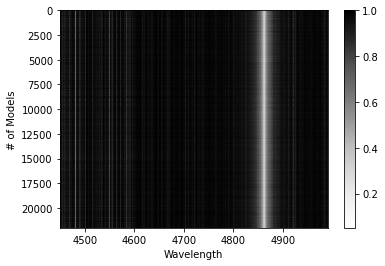

In [4]:
plt.imshow(mat, aspect='auto',cmap='Greys',extent=[lamb.min(),lamb.max(),nmod,0])
plt.title('') 
plt.xlabel('Wavelength')
plt.ylabel('# of Models')

plt.colorbar()
plt.savefig("Figures/colormap-2.pdf")


In [9]:
print(len(np.unique(teff)))
print(len(np.unique(logg)))
print(len(np.unique(vrot)))
print(len(np.unique(metal)))

80
60
300
3001


In [4]:
mn=np.mean(mat, axis=0)
C=mat-mn
e, s, aaa=np.linalg.linalg.svd(np.dot(np.transpose(C),C), full_matrices=False)
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))
del C
del grid

In [5]:
nk=50
p=np.zeros((nmod,nk),'Float32')
for k in np.arange(nk):
    for i in np.arange(nmod):
        p[i,k]=np.dot((mat[i,:]-mn),e[:,k])



lst=np.loadtxt("list_obs_noSNRV_meta",dtype=str)
lst2=np.loadtxt("list_spectra_60000_meta",dtype=str)


Observations=np.loadtxt("stackedspectra_noSNRV_meta.txt",dtype=float)
Observations.shape




Observations2=np.loadtxt("stackedspectra_with_meta.txt",dtype=float)
Observations2.shape


rho=np.zeros((Observations.shape[0],nk),'Float32')

for k in np.arange(nk):
    for i in np.arange(Observations.shape[0]):
        rho[i,k]=np.dot((Observations[i,:]-mn),e[:,k])

rho2=np.zeros((Observations2.shape[0],nk),'Float32')

for k in np.arange(nk):
    for i in np.arange(Observations2.shape[0]):
        rho2[i,k]=np.dot((Observations2[i,:]-mn),e[:,k])
        
vsini=[]
for i in np.arange(len(lst)):
    vsini.append(float(lst[i][51:54]))
grav=[]
for i in np.arange(len(lst)):
    grav.append(float(lst[i][42:46]))
temp=[]
for i in np.arange(len(lst)):
    temp.append(float(lst[i][35:41]))
meta=[]
for i in np.arange(len(lst)):
    meta.append(float(lst[i][67:73]))


vsini2=[]
for i in np.arange(len(lst2)):
    vsini2.append(float(lst2[i][51:54]))
grav2=[]
for i in np.arange(len(lst2)):
    grav2.append(float(lst2[i][42:46]))
temp2=[]
for i in np.arange(len(lst2)):
    temp2.append(float(lst2[i][35:41]))
meta2=[]
for i in np.arange(len(lst2)):
    meta2.append(float(lst2[i][67:73]))
    
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))    

<ipython-input-5-0b9c5d0a0aae>:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  p=np.zeros((nmod,nk),'Float32')
<ipython-input-5-0b9c5d0a0aae>:23: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  rho=np.zeros((Observations.shape[0],nk),'Float32')
<ipython-input-5-0b9c5d0a0aae>:29: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  rho2=np.zeros((Observations2.shape[0],nk),'Float32')


0

In [8]:
## Used for all cases and all parameters

#Data_augmentation=[0,1]
#nk_values=[12,20,50,100]
#kernel_values=['Zeros','Ones','RandomNormal','RandomUniform','TruncatedNormal','VarianceScaling'\
#               ,'Orthogonal','Identity','lecun_uniform','glorot_normal','glorot_uniform','he_normal',\
#               'lecun_normal','he_uniform']
#Dropouts=[0,0.1,0.3,0.4,0.5,0.8,1.0]
#losses=['mean_squared_error','mean_squared_logarithmic_error','mean_absolute_error']
#optimizers=['Adam','RMSprop','Adadelta','Adamax','Nadam','SGD']
#epochs=[50,100,300,500,1000,2000,3000,5000]
#batches=[1,2,4,8,16,32,64,128,254]
#activation_values=['relu','sigmoid','tanh','elu','selu']

#kernel_initializer='he_normal'

kernel_initializer='he_normal'
loss_value='mean_squared_logarithmic_error'
optimizer_value='Adam'
epochs_value=2000
batch_value=64
activation_function='relu'
Dropout_values=0.3

o=open("Big-Small-augmentation","a")
o.write("#Database"+"\t"+"eval_train_teff"+"\t"+"eval_test_teff"+"\t"+"eval_obs_teff"+"\t"+"eval_obs2_teff"+"\t"+"eval_train_logg"+"\t"+"eval_test_logg"+"\t"+"eval_obs_logg"+"\t"+"eval_obs2_logg"+"\t"+"eval_train_vrot"+"\t"+"eval_test_vrot"+"\t"+"eval_obs_vrot"+"\t"+"eval_obs2_vrot"+"\t"+"eval_train_metal"+"\t"+"eval_test_metal"+"\t"+"eval_obs_metal"+"\t"+"eval_obs2_metal"+"\n")               


y=np.zeros((len(p)))
for i in np.arange(len(p)):
    y[i]=teff[i]

y=y.reshape((y.shape[0],1))
out_dim=y.shape[1]
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]
X = X.reshape(list(X.shape) + [1])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
cnn = Sequential()
cnn.add(layers.InputLayer(input_shape=X_train.shape[1:]))
cnn.add(layers.Conv1D(8, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(layers.Conv1D(4, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(layers.Conv1D(4, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(Flatten())
cnn.add(Dense(units = 1024, activation = activation_function,kernel_initializer=kernel_initializer))
cnn.add(Dense(units = 512, activation = activation_function,kernel_initializer=kernel_initializer))
cnn.add(Dense(units = 64, activation = activation_function,kernel_initializer=kernel_initializer))
cnn.add(Dense(units = 10, activation = activation_function,kernel_initializer=kernel_initializer))
cnn.add(Dense(units = out_dim, activation = 'linear'))
cnn.compile(loss=loss_value, optimizer=optimizer_value,metrics=["mse"])

history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs_value, batch_size=batch_value)

Xobs=rho
Xobs = preprocessing.StandardScaler().fit(Xobs).transform(Xobs.astype(float))
Xobs = Xobs.reshape(list(Xobs.shape) + [1])
yobs=cnn.predict(Xobs)
Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
Xobs2 = Xobs2.reshape(list(Xobs2.shape) + [1])
yobs2=cnn.predict(Xobs2)
y_hat = cnn.predict(X_train)
y_pred = cnn.predict(X_test)

eval_train_teff=(1/len(y_train))*((abs(y_hat-y_train)**2).sum())
eval_test_teff=(1/len(y_test))*((abs(y_pred-y_test)**2).sum())
eval_obs_teff=(1/len(temp))*((abs(yobs[:,0]-temp)**2).sum())
eval_obs2_teff=(1/len(temp2))*((abs(yobs2[:,0]-temp2)**2).sum())
eval_train_teff=eval_train_teff**0.5
eval_test_teff=eval_test_teff**0.5
eval_obs_teff=eval_obs_teff**0.5
eval_obs2_teff=eval_obs2_teff**0.5

########----------------------logg---------------------


kernel_initializer='he_normal'
loss_value='mean_squared_logarithmic_error'
optimizer_value='Adamax'
epochs_value=3000
batch_value=128
activation_function='tanh'
Dropout_values=0.3


y=np.zeros((len(p)))

for i in np.arange(len(p)):
    y[i]=logg[i]

y=y.reshape((y.shape[0],1))
out_dim=y.shape[1]
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
    #y=np.array(teff)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]

X = X.reshape(list(X.shape) + [1])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

cnn = Sequential()
cnn.add(layers.InputLayer(input_shape=X_train.shape[1:]))
cnn.add(layers.Conv1D(8, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(layers.Conv1D(4, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(layers.Conv1D(4, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
                                        #cnn.add(layers.MaxPooling1D(pool_size=4,strides=1, padding='valid'))
cnn.add(Flatten())
cnn.add(Dense(units = 1024, activation = activation_function,kernel_initializer=kernel_initializer))
cnn.add(Dense(units = 512, activation = activation_function))
cnn.add(Dense(units = 64, activation = activation_function))
cnn.add(Dense(units = 10, activation = activation_function))

cnn.add(Dense(units = out_dim, activation = 'linear'))
cnn.compile(loss=loss_value, optimizer=optimizer_value,metrics=["accuracy"])

history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs_value, batch_size=batch_value)
y_hat = cnn.predict(X_train)
y_pred = cnn.predict(X_test)
yobs=cnn.predict(Xobs)
yobs2=cnn.predict(Xobs2)

eval_train_logg=(1/len(y_train))*((abs(y_hat-y_train)**2).sum())
eval_test_logg=(1/len(y_test))*((abs(y_pred-y_test)**2).sum())
eval_obs_logg=(1/len(grav))*((abs(yobs[:,0]-grav)**2).sum())
eval_obs2_logg=(1/len(grav2))*((abs(yobs2[:,0]-grav2)**2).sum())
eval_train_logg=eval_train_logg**0.5
eval_test_logg=eval_test_logg**0.5
eval_obs_logg=eval_obs_logg**0.5
eval_obs2_logg=eval_obs2_logg**0.5


#---------------------------vsini--------------------------
kernel_initializer='he_uniform'
loss_value='mean_squared_error'
optimizer_value='Adamax'
epochs_value=3000
batch_value=32
activation_function='tanh'
Dropout_values=0.3

y=np.zeros((len(p)))
for i in np.arange(len(p)):
    y[i]=vrot[i]


y=y.reshape((y.shape[0],1))
out_dim=y.shape[1]
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]

X = X.reshape(list(X.shape) + [1])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

cnn = Sequential()
cnn.add(layers.InputLayer(input_shape=X_train.shape[1:]))
cnn.add(layers.Conv1D(8, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(layers.Conv1D(4, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(layers.Conv1D(4, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(Flatten())
cnn.add(Dense(units = 1024, activation = activation_function,kernel_initializer=kernel_initializer))
cnn.add(Dense(units = 512, activation = activation_function))
cnn.add(Dense(units = 64, activation = activation_function))
cnn.add(Dense(units = 10, activation = activation_function))
cnn.add(Dense(units = out_dim, activation = 'linear'))
cnn.compile(loss=loss_value, optimizer=optimizer_value,metrics=["accuracy"])

history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs_value, batch_size=batch_value)
y_hat = cnn.predict(X_train)
y_pred = cnn.predict(X_test)
yobs=cnn.predict(Xobs)
yobs2=cnn.predict(Xobs2)
eval_train_vrot=(1/len(y_train))*((abs(y_hat-y_train)**2).sum())
eval_test_vrot=(1/len(y_test))*((abs(y_pred-y_test)**2).sum())
eval_obs_vrot=(1/len(vsini))*((abs(yobs[:,0]-vsini)**2).sum())
eval_obs2_vrot=(1/len(vsini2))*((abs(yobs2[:,0]-vsini2)**2).sum())

eval_train_vrot=eval_train_vrot**0.5
eval_test_vrot=eval_test_vrot**0.5
eval_obs_vrot=eval_obs_vrot**0.5
eval_obs2_vrot=eval_obs2_vrot**0.5
    
    
######--------------Meta-----------------------------------------
kernel_initializer='RandomUniform'
loss_value='mean_absolute_error'
optimizer_value='Adam'
epochs_value=1000
batch_value=16
activation_function='tanh'
Dropout_values=0.2

y=np.zeros((len(p)))
for i in np.arange(len(p)):
    y[i]=metal[i]

y=y.reshape((y.shape[0],1))
out_dim=y.shape[1]
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]
X = X.reshape(list(X.shape) + [1])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
cnn = Sequential()
cnn.add(layers.InputLayer(input_shape=X_train.shape[1:]))
cnn.add(layers.Conv1D(8, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(layers.Conv1D(4, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(layers.Conv1D(4, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(Flatten())
cnn.add(Dense(units = 1024, activation = activation_function,kernel_initializer=kernel_initializer))
cnn.add(Dense(units = 512, activation = activation_function))
cnn.add(Dense(units = 64, activation = activation_function))
cnn.add(Dense(units = 10, activation = activation_function))
cnn.add(Dense(units = out_dim, activation = 'linear'))
cnn.compile(loss=loss_value, optimizer=optimizer_value,metrics=["accuracy"])

history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs_value, batch_size=batch_value)
y_hat = cnn.predict(X_train)
y_pred = cnn.predict(X_test)
yobs=cnn.predict(Xobs)
yobs2=cnn.predict(Xobs2)

eval_train_meta=(1/len(y_train))*((abs(y_hat-y_train)**2).sum())
eval_test_meta=(1/len(y_test))*((abs(y_pred-y_test)**2).sum())
eval_obs_meta=(1/len(meta))*((abs(yobs[:,0]-meta)**2).sum())
eval_obs2_meta=(1/len(meta2))*((abs(yobs2[:,0]-meta2)**2).sum())
eval_train_meta=eval_train_meta**0.5
eval_test_meta=eval_test_meta**0.5
eval_obs_meta=eval_obs_meta**0.5
eval_obs2_meta=eval_obs2_meta**0.5
    
    
    
    
o.write("TDB1_nodropout"+"\t"+str(eval_train_teff)+"\t"+str(eval_test_teff)+"\t"+str(eval_obs_teff)+"\t"+str(eval_obs2_teff)+"\t"+str(eval_train_logg)+"\t"+str(eval_test_logg)+"\t"+str(eval_obs_logg)+"\t"+str(eval_obs2_logg)+"\t"+str(eval_train_vrot)+"\t"+str(eval_test_vrot)+"\t"+str(eval_obs_vrot)+"\t"+str(eval_obs2_vrot)+"\t"+str(eval_train_meta)+"\t"+str(eval_test_meta)+"\t"+str(eval_obs_meta)+"\t"+str(eval_obs2_meta)+"\n")               

o.close()    
    

duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))









Targets have the dimension of  (22011, 1)
The features have the dimension of (22011, 50)
Train set: (17608, 50, 1) (17608, 1)
Test set: (4403, 50, 1) (4403, 1)
Epoch 1/2000
276/276 [==============================] - 3s 10ms/step - loss: 3.4105 - mse: 27366318.0000 - val_loss: 0.1035 - val_mse: 11688615.0000
Epoch 2/2000
276/276 [==============================] - 2s 9ms/step - loss: 0.0982 - mse: 11987451.0000 - val_loss: 0.0511 - val_mse: 5136089.5000
Epoch 3/2000
276/276 [==============================] - 2s 8ms/step - loss: 0.0474 - mse: 4843709.0000 - val_loss: 0.0196 - val_mse: 1665485.5000
Epoch 4/2000
276/276 [==============================] - 2s 9ms/step - loss: 0.0262 - mse: 2260019.7500 - val_loss: 0.0151 - val_mse: 1219097.5000
Epoch 5/2000
276/276 [==============================] - 2s 9ms/step - loss: 0.0211 - mse: 1725865.8750 - val_loss: 0.0136 - val_mse: 1093488.7500
Epoch 6/2000
276/276 [==============================] - 2s 9ms/step - loss: 0.0203 - mse: 1642504.7500 - v

Epoch 111/2000
276/276 [==============================] - 2s 8ms/step - loss: 7.6412e-04 - mse: 63868.4023 - val_loss: 3.2153e-04 - val_mse: 27456.0449
Epoch 112/2000
276/276 [==============================] - 2s 8ms/step - loss: 7.5460e-04 - mse: 62932.7617 - val_loss: 4.9236e-04 - val_mse: 45261.2969
Epoch 113/2000
276/276 [==============================] - 2s 8ms/step - loss: 7.1903e-04 - mse: 60225.5820 - val_loss: 3.5315e-04 - val_mse: 26158.3301
Epoch 114/2000
276/276 [==============================] - 2s 8ms/step - loss: 7.1830e-04 - mse: 60334.9023 - val_loss: 3.2865e-04 - val_mse: 27822.4453
Epoch 115/2000
276/276 [==============================] - 2s 8ms/step - loss: 7.2018e-04 - mse: 60218.3828 - val_loss: 5.1809e-04 - val_mse: 47352.4062
Epoch 116/2000
276/276 [==============================] - 2s 8ms/step - loss: 6.8033e-04 - mse: 57107.0195 - val_loss: 3.0393e-04 - val_mse: 26912.9004
Epoch 117/2000
276/276 [==============================] - 2s 8ms/step - loss: 7.3300e-04

Epoch 165/2000
276/276 [==============================] - 2s 8ms/step - loss: 5.4772e-04 - mse: 46174.6836 - val_loss: 2.9477e-04 - val_mse: 26237.8223
Epoch 166/2000
276/276 [==============================] - 2s 8ms/step - loss: 5.6703e-04 - mse: 47764.4961 - val_loss: 2.4765e-04 - val_mse: 21231.7148
Epoch 167/2000
276/276 [==============================] - 2s 8ms/step - loss: 5.6434e-04 - mse: 47510.3906 - val_loss: 2.2169e-04 - val_mse: 18480.6992
Epoch 168/2000
276/276 [==============================] - 2s 8ms/step - loss: 5.6255e-04 - mse: 47379.7891 - val_loss: 2.3552e-04 - val_mse: 19915.6230
Epoch 169/2000
276/276 [==============================] - 2s 8ms/step - loss: 5.6169e-04 - mse: 47563.0273 - val_loss: 2.4691e-04 - val_mse: 19659.6465
Epoch 170/2000
276/276 [==============================] - 2s 8ms/step - loss: 5.4164e-04 - mse: 45899.3984 - val_loss: 2.0610e-04 - val_mse: 17475.6621
Epoch 171/2000
276/276 [==============================] - 2s 8ms/step - loss: 5.4822e-04

Epoch 219/2000
276/276 [==============================] - 2s 8ms/step - loss: 4.8487e-04 - mse: 41050.5938 - val_loss: 1.9868e-04 - val_mse: 16342.1396
Epoch 220/2000
276/276 [==============================] - 2s 8ms/step - loss: 4.7667e-04 - mse: 40254.8945 - val_loss: 2.0495e-04 - val_mse: 16876.2266
Epoch 221/2000
276/276 [==============================] - 2s 8ms/step - loss: 4.5925e-04 - mse: 38589.1172 - val_loss: 2.6137e-04 - val_mse: 20817.6094
Epoch 222/2000
276/276 [==============================] - 2s 8ms/step - loss: 4.6740e-04 - mse: 39355.1680 - val_loss: 2.1792e-04 - val_mse: 17595.4570
Epoch 223/2000
276/276 [==============================] - 2s 8ms/step - loss: 4.8159e-04 - mse: 40689.3594 - val_loss: 2.0298e-04 - val_mse: 17139.7070
Epoch 224/2000
276/276 [==============================] - 2s 8ms/step - loss: 4.7308e-04 - mse: 39927.6680 - val_loss: 3.0109e-04 - val_mse: 25612.1172
Epoch 225/2000
276/276 [==============================] - 2s 8ms/step - loss: 4.6918e-04

Epoch 273/2000
276/276 [==============================] - 2s 8ms/step - loss: 4.2447e-04 - mse: 35649.4727 - val_loss: 1.9293e-04 - val_mse: 16542.4785
Epoch 274/2000
276/276 [==============================] - 2s 8ms/step - loss: 4.4502e-04 - mse: 37660.2227 - val_loss: 1.9123e-04 - val_mse: 16377.9844
Epoch 275/2000
276/276 [==============================] - 2s 8ms/step - loss: 4.2839e-04 - mse: 36251.4102 - val_loss: 1.7471e-04 - val_mse: 14737.7861
Epoch 276/2000
276/276 [==============================] - 2s 8ms/step - loss: 4.4155e-04 - mse: 37239.8164 - val_loss: 1.9126e-04 - val_mse: 16379.2920
Epoch 277/2000
276/276 [==============================] - 2s 8ms/step - loss: 4.3391e-04 - mse: 36660.1328 - val_loss: 1.8910e-04 - val_mse: 16189.8994
Epoch 278/2000
276/276 [==============================] - 2s 8ms/step - loss: 4.3256e-04 - mse: 36589.6133 - val_loss: 1.8983e-04 - val_mse: 16194.6924
Epoch 279/2000
276/276 [==============================] - 2s 8ms/step - loss: 4.3150e-04

Epoch 327/2000
276/276 [==============================] - 2s 8ms/step - loss: 4.0038e-04 - mse: 33808.6875 - val_loss: 1.9993e-04 - val_mse: 16705.3027
Epoch 328/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.9259e-04 - mse: 33177.1094 - val_loss: 1.8852e-04 - val_mse: 16038.1143
Epoch 329/2000
276/276 [==============================] - 2s 8ms/step - loss: 4.0279e-04 - mse: 34028.4727 - val_loss: 1.8971e-04 - val_mse: 16135.2002
Epoch 330/2000
276/276 [==============================] - 2s 8ms/step - loss: 4.0452e-04 - mse: 34193.3906 - val_loss: 1.9893e-04 - val_mse: 16529.0176
Epoch 331/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.9459e-04 - mse: 33475.8398 - val_loss: 1.8695e-04 - val_mse: 15729.5264
Epoch 332/2000
276/276 [==============================] - 2s 8ms/step - loss: 4.0447e-04 - mse: 34018.8047 - val_loss: 2.0775e-04 - val_mse: 17787.4590
Epoch 333/2000
276/276 [==============================] - 2s 8ms/step - loss: 4.1095e-04

Epoch 381/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.7935e-04 - mse: 32069.6855 - val_loss: 1.8252e-04 - val_mse: 15733.9014
Epoch 382/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.8276e-04 - mse: 32412.7793 - val_loss: 1.8309e-04 - val_mse: 15412.7207
Epoch 383/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.7273e-04 - mse: 31442.9180 - val_loss: 1.8177e-04 - val_mse: 15357.0107
Epoch 384/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.9204e-04 - mse: 32982.9102 - val_loss: 1.6637e-04 - val_mse: 14153.6367
Epoch 385/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.7306e-04 - mse: 31513.9473 - val_loss: 2.0008e-04 - val_mse: 17028.7559
Epoch 386/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.7070e-04 - mse: 31390.4883 - val_loss: 2.0465e-04 - val_mse: 17509.7754
Epoch 387/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.7225e-04

Epoch 435/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.6140e-04 - mse: 30463.1445 - val_loss: 1.7505e-04 - val_mse: 14783.8506
Epoch 436/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.7666e-04 - mse: 31890.7852 - val_loss: 1.9386e-04 - val_mse: 16421.1641
Epoch 437/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.5634e-04 - mse: 30041.3008 - val_loss: 1.9074e-04 - val_mse: 16009.7803
Epoch 438/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.5981e-04 - mse: 30510.7754 - val_loss: 1.8932e-04 - val_mse: 16119.0283
Epoch 439/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.5935e-04 - mse: 30380.1055 - val_loss: 2.1906e-04 - val_mse: 18288.8789
Epoch 440/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.6710e-04 - mse: 31050.9668 - val_loss: 2.3242e-04 - val_mse: 19378.5938
Epoch 441/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.6948e-04

Epoch 489/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.5326e-04 - mse: 29739.7852 - val_loss: 2.0388e-04 - val_mse: 17482.2246
Epoch 490/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.4414e-04 - mse: 29042.7656 - val_loss: 2.1524e-04 - val_mse: 18015.1094
Epoch 491/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.4281e-04 - mse: 29013.0859 - val_loss: 2.0977e-04 - val_mse: 17301.4316
Epoch 492/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.5323e-04 - mse: 29775.7812 - val_loss: 2.2815e-04 - val_mse: 18675.7773
Epoch 493/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.4401e-04 - mse: 28994.5488 - val_loss: 1.9663e-04 - val_mse: 16634.5859
Epoch 494/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.4461e-04 - mse: 29086.5156 - val_loss: 1.8041e-04 - val_mse: 15142.4316
Epoch 495/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.4184e-04

Epoch 543/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.4671e-04 - mse: 29160.8145 - val_loss: 2.0293e-04 - val_mse: 16801.8555
Epoch 544/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.3822e-04 - mse: 28680.8633 - val_loss: 1.7713e-04 - val_mse: 15019.2900
Epoch 545/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.3350e-04 - mse: 28237.6562 - val_loss: 1.9298e-04 - val_mse: 16296.4629
Epoch 546/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.4495e-04 - mse: 29016.4102 - val_loss: 1.8295e-04 - val_mse: 15470.4141
Epoch 547/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.3032e-04 - mse: 27956.4355 - val_loss: 1.8513e-04 - val_mse: 15628.5264
Epoch 548/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.4021e-04 - mse: 28802.2363 - val_loss: 2.4091e-04 - val_mse: 20590.5762
Epoch 549/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.4751e-04

Epoch 597/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.3725e-04 - mse: 28335.9531 - val_loss: 1.8125e-04 - val_mse: 15728.5215
Epoch 598/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.2449e-04 - mse: 27471.6504 - val_loss: 1.8279e-04 - val_mse: 15551.6787
Epoch 599/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.2319e-04 - mse: 27322.2598 - val_loss: 1.7948e-04 - val_mse: 15231.6348
Epoch 600/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.2379e-04 - mse: 27299.4180 - val_loss: 1.8675e-04 - val_mse: 15402.0928
Epoch 601/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.2896e-04 - mse: 27756.7422 - val_loss: 1.8374e-04 - val_mse: 15135.6250
Epoch 602/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.3858e-04 - mse: 28522.9648 - val_loss: 1.9436e-04 - val_mse: 16397.4531
Epoch 603/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.2882e-04

Epoch 651/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.3246e-04 - mse: 28097.0293 - val_loss: 1.7431e-04 - val_mse: 14686.0146
Epoch 652/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.2206e-04 - mse: 27223.6953 - val_loss: 1.7768e-04 - val_mse: 14918.0488
Epoch 653/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.2379e-04 - mse: 27311.3086 - val_loss: 2.0418e-04 - val_mse: 17559.1895
Epoch 654/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.1802e-04 - mse: 26920.7969 - val_loss: 1.7339e-04 - val_mse: 14723.5156
Epoch 655/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.2532e-04 - mse: 27454.7949 - val_loss: 1.7810e-04 - val_mse: 15238.4268
Epoch 656/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.3332e-04 - mse: 28039.3594 - val_loss: 1.9462e-04 - val_mse: 16712.2891
Epoch 657/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.0708e-04

Epoch 705/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.0449e-04 - mse: 25614.1035 - val_loss: 2.0020e-04 - val_mse: 16727.3730
Epoch 706/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.0460e-04 - mse: 25837.0938 - val_loss: 1.8131e-04 - val_mse: 15221.3828
Epoch 707/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.0038e-04 - mse: 25228.8633 - val_loss: 1.9821e-04 - val_mse: 17106.9375
Epoch 708/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.1322e-04 - mse: 26332.1406 - val_loss: 2.0347e-04 - val_mse: 18213.6777
Epoch 709/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.1302e-04 - mse: 26398.5645 - val_loss: 2.2029e-04 - val_mse: 18078.7832
Epoch 710/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.1551e-04 - mse: 26714.6797 - val_loss: 2.1032e-04 - val_mse: 17347.9414
Epoch 711/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.1318e-04

Epoch 759/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.9878e-04 - mse: 25158.5352 - val_loss: 1.7993e-04 - val_mse: 15395.6289
Epoch 760/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.0280e-04 - mse: 25637.4980 - val_loss: 1.8025e-04 - val_mse: 15366.2607
Epoch 761/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.9763e-04 - mse: 25116.7207 - val_loss: 1.9825e-04 - val_mse: 16952.7090
Epoch 762/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.9233e-04 - mse: 24851.4121 - val_loss: 1.8255e-04 - val_mse: 15418.4131
Epoch 763/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.1078e-04 - mse: 26335.7168 - val_loss: 1.8793e-04 - val_mse: 15969.2686
Epoch 764/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.1467e-04 - mse: 26424.1680 - val_loss: 2.1569e-04 - val_mse: 17417.5078
Epoch 765/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.9380e-04

Epoch 813/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.0371e-04 - mse: 25660.1270 - val_loss: 2.0731e-04 - val_mse: 17343.4297
Epoch 814/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.9873e-04 - mse: 25168.4062 - val_loss: 2.1431e-04 - val_mse: 17502.6484
Epoch 815/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.0436e-04 - mse: 25789.7402 - val_loss: 1.7508e-04 - val_mse: 15037.9238
Epoch 816/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.0062e-04 - mse: 25472.8359 - val_loss: 1.8135e-04 - val_mse: 15094.9922
Epoch 817/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.9116e-04 - mse: 24608.9336 - val_loss: 2.5721e-04 - val_mse: 21204.6426
Epoch 818/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.9726e-04 - mse: 25005.2559 - val_loss: 2.5887e-04 - val_mse: 20787.4961
Epoch 819/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.0216e-04

Epoch 867/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.0025e-04 - mse: 25308.3008 - val_loss: 1.9570e-04 - val_mse: 16302.1338
Epoch 868/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.0902e-04 - mse: 26063.5527 - val_loss: 2.1799e-04 - val_mse: 18701.7363
Epoch 869/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.9660e-04 - mse: 25058.1094 - val_loss: 1.7666e-04 - val_mse: 14923.5010
Epoch 870/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.9437e-04 - mse: 24902.1602 - val_loss: 1.6692e-04 - val_mse: 14048.1396
Epoch 871/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.0298e-04 - mse: 25601.4043 - val_loss: 1.8228e-04 - val_mse: 15485.5850
Epoch 872/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.0347e-04 - mse: 25614.8789 - val_loss: 2.0184e-04 - val_mse: 17026.3613
Epoch 873/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.0284e-04

Epoch 921/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.9998e-04 - mse: 25315.3848 - val_loss: 1.8836e-04 - val_mse: 16102.8916
Epoch 922/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.9383e-04 - mse: 24802.2188 - val_loss: 1.8007e-04 - val_mse: 15426.9980
Epoch 923/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.0369e-04 - mse: 25591.4492 - val_loss: 1.8350e-04 - val_mse: 15872.8926
Epoch 924/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.8729e-04 - mse: 24120.1895 - val_loss: 1.7465e-04 - val_mse: 14696.8428
Epoch 925/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.8631e-04 - mse: 24245.7617 - val_loss: 1.7801e-04 - val_mse: 15080.2129
Epoch 926/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.9934e-04 - mse: 25254.4902 - val_loss: 1.9500e-04 - val_mse: 16288.6084
Epoch 927/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.8660e-04

Epoch 975/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.8903e-04 - mse: 24501.9121 - val_loss: 1.7684e-04 - val_mse: 14975.9082
Epoch 976/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.9373e-04 - mse: 24987.3457 - val_loss: 1.9873e-04 - val_mse: 17013.6602
Epoch 977/2000
276/276 [==============================] - 2s 8ms/step - loss: 3.0143e-04 - mse: 25282.4961 - val_loss: 1.9548e-04 - val_mse: 16714.3242
Epoch 978/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.8972e-04 - mse: 24590.7812 - val_loss: 1.8880e-04 - val_mse: 16243.6104
Epoch 979/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.8807e-04 - mse: 24479.3516 - val_loss: 2.0061e-04 - val_mse: 16495.8750
Epoch 980/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.9007e-04 - mse: 24548.1699 - val_loss: 1.8924e-04 - val_mse: 16280.3818
Epoch 981/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.8991e-04

Epoch 1029/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.8005e-04 - mse: 23653.7949 - val_loss: 1.8120e-04 - val_mse: 15332.9551
Epoch 1030/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.8903e-04 - mse: 24416.2656 - val_loss: 2.0541e-04 - val_mse: 18005.3672
Epoch 1031/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.9373e-04 - mse: 24748.8750 - val_loss: 2.1071e-04 - val_mse: 18650.4375
Epoch 1032/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.7652e-04 - mse: 23433.3633 - val_loss: 1.9047e-04 - val_mse: 16122.5928
Epoch 1033/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.8115e-04 - mse: 23764.9727 - val_loss: 2.1383e-04 - val_mse: 18625.3008
Epoch 1034/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.8167e-04 - mse: 23789.6484 - val_loss: 1.9674e-04 - val_mse: 16049.2734
Epoch 1035/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.8

276/276 [==============================] - 2s 8ms/step - loss: 2.7684e-04 - mse: 23436.3223 - val_loss: 1.8667e-04 - val_mse: 15657.1533
Epoch 1136/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.7968e-04 - mse: 23659.3750 - val_loss: 2.1669e-04 - val_mse: 17334.1621
Epoch 1137/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.7008e-04 - mse: 22923.4180 - val_loss: 2.3828e-04 - val_mse: 18982.6855
Epoch 1138/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.6914e-04 - mse: 22783.4531 - val_loss: 1.9871e-04 - val_mse: 16876.0488
Epoch 1139/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.7547e-04 - mse: 23373.4180 - val_loss: 1.8481e-04 - val_mse: 15848.9443
Epoch 1140/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.8324e-04 - mse: 24054.1738 - val_loss: 2.1031e-04 - val_mse: 18107.8691
Epoch 1141/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.8124e-04 - mse: 2

276/276 [==============================] - 2s 8ms/step - loss: 2.6848e-04 - mse: 22776.4004 - val_loss: 2.0474e-04 - val_mse: 17774.0000
Epoch 1242/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.6963e-04 - mse: 22799.2715 - val_loss: 2.0352e-04 - val_mse: 16855.1289
Epoch 1243/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.7125e-04 - mse: 22966.6777 - val_loss: 1.9133e-04 - val_mse: 16354.1562
Epoch 1244/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.6547e-04 - mse: 22348.5273 - val_loss: 1.9446e-04 - val_mse: 16529.4570
Epoch 1245/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.7125e-04 - mse: 23090.5918 - val_loss: 1.9481e-04 - val_mse: 16322.2461
Epoch 1246/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.6957e-04 - mse: 22791.9570 - val_loss: 1.8680e-04 - val_mse: 15780.9072
Epoch 1247/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.6522e-04 - mse: 2

276/276 [==============================] - 2s 8ms/step - loss: 2.5905e-04 - mse: 21869.5859 - val_loss: 1.8724e-04 - val_mse: 15920.9033
Epoch 1348/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.6980e-04 - mse: 22870.6934 - val_loss: 2.0117e-04 - val_mse: 17240.7461
Epoch 1349/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.6918e-04 - mse: 22678.2344 - val_loss: 1.8792e-04 - val_mse: 15674.7598
Epoch 1350/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.7402e-04 - mse: 23285.5781 - val_loss: 2.0082e-04 - val_mse: 17173.6562
Epoch 1351/2000
276/276 [==============================] - 2s 9ms/step - loss: 2.6313e-04 - mse: 22299.2891 - val_loss: 1.8948e-04 - val_mse: 15729.1787
Epoch 1352/2000
276/276 [==============================] - 2s 9ms/step - loss: 2.6491e-04 - mse: 22414.3516 - val_loss: 2.0280e-04 - val_mse: 17414.8223
Epoch 1353/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.6177e-04 - mse: 2

276/276 [==============================] - 2s 8ms/step - loss: 2.5543e-04 - mse: 21639.0703 - val_loss: 2.0844e-04 - val_mse: 17824.1953
Epoch 1454/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.5684e-04 - mse: 21751.2578 - val_loss: 1.8540e-04 - val_mse: 15367.9785
Epoch 1455/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.4954e-04 - mse: 21057.1855 - val_loss: 1.8291e-04 - val_mse: 15332.5293
Epoch 1456/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.6105e-04 - mse: 22084.3613 - val_loss: 1.8089e-04 - val_mse: 15464.5908
Epoch 1457/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.5920e-04 - mse: 21897.2402 - val_loss: 1.8774e-04 - val_mse: 15939.5771
Epoch 1458/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.5000e-04 - mse: 21189.5781 - val_loss: 1.8859e-04 - val_mse: 15591.9561
Epoch 1459/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.6286e-04 - mse: 2

276/276 [==============================] - 2s 8ms/step - loss: 2.5492e-04 - mse: 21508.4199 - val_loss: 1.9079e-04 - val_mse: 16282.8994
Epoch 1560/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.5189e-04 - mse: 21295.5000 - val_loss: 2.1638e-04 - val_mse: 17688.8867
Epoch 1561/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.6110e-04 - mse: 22034.0195 - val_loss: 2.0160e-04 - val_mse: 17513.4062
Epoch 1562/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.5560e-04 - mse: 21640.1191 - val_loss: 1.9003e-04 - val_mse: 15780.0557
Epoch 1563/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.5546e-04 - mse: 21719.1523 - val_loss: 1.9124e-04 - val_mse: 16319.9980
Epoch 1564/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.5602e-04 - mse: 21678.3086 - val_loss: 2.1134e-04 - val_mse: 18264.3516
Epoch 1565/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.4850e-04 - mse: 2

276/276 [==============================] - 3s 9ms/step - loss: 2.5389e-04 - mse: 21406.1152 - val_loss: 1.8795e-04 - val_mse: 16228.0498
Epoch 1666/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.4914e-04 - mse: 21075.9707 - val_loss: 1.8396e-04 - val_mse: 15656.5869
Epoch 1667/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.5841e-04 - mse: 21935.5430 - val_loss: 1.9070e-04 - val_mse: 15867.0635
Epoch 1668/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.4472e-04 - mse: 20659.5938 - val_loss: 1.9565e-04 - val_mse: 16808.3457
Epoch 1669/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.5181e-04 - mse: 21216.5605 - val_loss: 1.8042e-04 - val_mse: 15140.1934
Epoch 1670/2000
276/276 [==============================] - 2s 9ms/step - loss: 2.7180e-04 - mse: 22861.3281 - val_loss: 2.3586e-04 - val_mse: 18998.6836
Epoch 1671/2000
276/276 [==============================] - 2s 9ms/step - loss: 2.6120e-04 - mse: 2

276/276 [==============================] - 2s 8ms/step - loss: 2.4966e-04 - mse: 21115.1777 - val_loss: 2.0490e-04 - val_mse: 16634.9922
Epoch 1772/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.4556e-04 - mse: 20840.7285 - val_loss: 1.9653e-04 - val_mse: 16484.1582
Epoch 1773/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.5497e-04 - mse: 21581.8809 - val_loss: 2.4288e-04 - val_mse: 19324.4590
Epoch 1774/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.3871e-04 - mse: 20129.8301 - val_loss: 2.1198e-04 - val_mse: 17256.8926
Epoch 1775/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.4084e-04 - mse: 20406.7910 - val_loss: 2.4774e-04 - val_mse: 20059.1348
Epoch 1776/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.4587e-04 - mse: 20912.5879 - val_loss: 1.9227e-04 - val_mse: 15875.6025
Epoch 1777/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.4656e-04 - mse: 2

276/276 [==============================] - 2s 8ms/step - loss: 2.5460e-04 - mse: 21473.0332 - val_loss: 1.8765e-04 - val_mse: 15526.0869
Epoch 1878/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.4581e-04 - mse: 20809.9062 - val_loss: 1.8097e-04 - val_mse: 15515.9736
Epoch 1879/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.2803e-04 - mse: 19292.0488 - val_loss: 1.9038e-04 - val_mse: 16170.7178
Epoch 1880/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.5025e-04 - mse: 21075.0957 - val_loss: 1.8826e-04 - val_mse: 15742.5723
Epoch 1881/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.4375e-04 - mse: 20583.6973 - val_loss: 1.8450e-04 - val_mse: 15363.8408
Epoch 1882/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.6543e-04 - mse: 22372.1426 - val_loss: 2.0067e-04 - val_mse: 17226.9199
Epoch 1883/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.4910e-04 - mse: 2

276/276 [==============================] - 2s 8ms/step - loss: 2.3825e-04 - mse: 20161.0645 - val_loss: 1.8007e-04 - val_mse: 15330.1855
Epoch 1984/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.5143e-04 - mse: 21386.9688 - val_loss: 2.0558e-04 - val_mse: 16837.1992
Epoch 1985/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.4962e-04 - mse: 21152.4473 - val_loss: 2.3020e-04 - val_mse: 18381.5215
Epoch 1986/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.4700e-04 - mse: 20916.7148 - val_loss: 1.9893e-04 - val_mse: 16976.0625
Epoch 1987/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.4763e-04 - mse: 20982.9277 - val_loss: 2.0504e-04 - val_mse: 17112.4473
Epoch 1988/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.4249e-04 - mse: 20542.1094 - val_loss: 2.0426e-04 - val_mse: 17547.5488
Epoch 1989/2000
276/276 [==============================] - 2s 8ms/step - loss: 2.4284e-04 - mse: 2

138/138 [==============================] - 2s 12ms/step - loss: 0.0022 - accuracy: 0.0000e+00 - val_loss: 7.7473e-04 - val_accuracy: 0.0000e+00
Epoch 88/3000
138/138 [==============================] - 2s 11ms/step - loss: 0.0022 - accuracy: 0.0000e+00 - val_loss: 8.0609e-04 - val_accuracy: 0.0000e+00
Epoch 89/3000
138/138 [==============================] - 2s 12ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 7.0805e-04 - val_accuracy: 0.0000e+00
Epoch 90/3000
138/138 [==============================] - 2s 11ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 7.7978e-04 - val_accuracy: 0.0000e+00
Epoch 91/3000
138/138 [==============================] - 2s 11ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 7.6723e-04 - val_accuracy: 0.0000e+00
Epoch 92/3000
138/138 [==============================] - 2s 11ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 9.1435e-04 - val_accuracy: 0.0000e+00
Epoch 93/3000
138/138 [==============================] - 2s 12ms/s

Epoch 139/3000
138/138 [==============================] - 2s 12ms/step - loss: 0.0016 - accuracy: 0.0000e+00 - val_loss: 6.0321e-04 - val_accuracy: 0.0000e+00
Epoch 140/3000
138/138 [==============================] - 2s 11ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 6.4422e-04 - val_accuracy: 0.0000e+00
Epoch 141/3000
138/138 [==============================] - 2s 11ms/step - loss: 0.0017 - accuracy: 0.0000e+00 - val_loss: 6.5287e-04 - val_accuracy: 0.0000e+00
Epoch 142/3000
138/138 [==============================] - 2s 11ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 6.7591e-04 - val_accuracy: 0.0000e+00
Epoch 143/3000
138/138 [==============================] - 2s 12ms/step - loss: 0.0016 - accuracy: 0.0000e+00 - val_loss: 6.1336e-04 - val_accuracy: 0.0000e+00
Epoch 144/3000
138/138 [==============================] - 2s 12ms/step - loss: 0.0016 - accuracy: 0.0000e+00 - val_loss: 6.2895e-04 - val_accuracy: 0.0000e+00
Epoch 145/3000
138/138 [======================

KeyboardInterrupt: 

# Teff


In [6]:
kernel_initializer='he_normal'
loss_value='mean_squared_logarithmic_error'
optimizer_value='Adam'
epochs_value=2000
batch_value=64
activation_function='relu'
Dropout_values=0.3

y=np.zeros((len(p)))
for i in np.arange(len(p)):
    y[i]=teff[i]

y=y.reshape((y.shape[0],1))
out_dim=y.shape[1]
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]
X = X.reshape(list(X.shape) + [1])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
cnn = Sequential()
cnn.add(layers.InputLayer(input_shape=X_train.shape[1:]))
cnn.add(layers.Conv1D(8, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(layers.Conv1D(4, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(layers.Conv1D(4, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(Flatten())
cnn.add(Dense(units = 1024, activation = activation_function,kernel_initializer=kernel_initializer))
cnn.add(Dense(units = 512, activation = activation_function,kernel_initializer=kernel_initializer))
cnn.add(Dense(units = 64, activation = activation_function,kernel_initializer=kernel_initializer))
cnn.add(Dense(units = 10, activation = activation_function,kernel_initializer=kernel_initializer))
cnn.add(Dense(units = out_dim, activation = 'linear'))
cnn.compile(loss=loss_value, optimizer=optimizer_value,metrics=["mse"])

history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs_value, batch_size=batch_value)





Targets have the dimension of  (191385, 1)
The features have the dimension of (191385, 50)
Train set: (153108, 50, 1) (153108, 1)
Test set: (38277, 50, 1) (38277, 1)
Epoch 1/2000
2393/2393 [==============================] - 20s 6ms/step - loss: 2.2701 - mse: 16453078.4687 - val_loss: 0.0139 - val_mse: 1134405.7500
Epoch 2/2000
2393/2393 [==============================] - 13s 5ms/step - loss: 0.0259 - mse: 2065198.9394 - val_loss: 0.0109 - val_mse: 909724.4375
Epoch 3/2000
2393/2393 [==============================] - 13s 5ms/step - loss: 0.0188 - mse: 1502752.6172 - val_loss: 0.0100 - val_mse: 822817.1875
Epoch 4/2000
2393/2393 [==============================] - 13s 5ms/step - loss: 0.0105 - mse: 836354.2273 - val_loss: 0.0078 - val_mse: 562904.6875
Epoch 5/2000
2393/2393 [==============================] - 14s 6ms/step - loss: 0.0048 - mse: 386299.3526 - val_loss: 0.0027 - val_mse: 186003.6562
Epoch 6/2000
2393/2393 [==============================] - 12s 5ms/step - loss: 0.0027 - mse: 2

2393/2393 [==============================] - 9s 4ms/step - loss: 3.4973e-04 - mse: 29827.5346 - val_loss: 1.6750e-04 - val_mse: 15029.6924
Epoch 107/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 3.5508e-04 - mse: 30231.7915 - val_loss: 1.6890e-04 - val_mse: 14954.0967
Epoch 108/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 3.5006e-04 - mse: 29848.0283 - val_loss: 1.6732e-04 - val_mse: 14808.0332
Epoch 109/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 3.5458e-04 - mse: 30272.6976 - val_loss: 1.4457e-04 - val_mse: 12718.4072
Epoch 110/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 3.5421e-04 - mse: 30224.8241 - val_loss: 2.0013e-04 - val_mse: 17098.4395
Epoch 111/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 3.6242e-04 - mse: 30843.2076 - val_loss: 1.8607e-04 - val_mse: 16027.8877
Epoch 112/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 3.6740e-04 

2393/2393 [==============================] - 10s 4ms/step - loss: 3.3247e-04 - mse: 28380.3250 - val_loss: 1.9945e-04 - val_mse: 16988.3242
Epoch 213/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 3.4195e-04 - mse: 29213.1610 - val_loss: 1.8740e-04 - val_mse: 16600.0020
Epoch 214/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 3.2521e-04 - mse: 27851.8959 - val_loss: 1.6551e-04 - val_mse: 14345.2783
Epoch 215/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 3.2528e-04 - mse: 27781.3299 - val_loss: 2.0201e-04 - val_mse: 18417.8848
Epoch 216/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 3.2665e-04 - mse: 27886.2032 - val_loss: 2.0724e-04 - val_mse: 16960.3594
Epoch 217/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 3.2713e-04 - mse: 27986.5011 - val_loss: 1.6466e-04 - val_mse: 14209.9551
Epoch 218/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 3.2890e-04

2393/2393 [==============================] - 9s 4ms/step - loss: 3.1236e-04 - mse: 26722.1738 - val_loss: 2.1405e-04 - val_mse: 17626.5938
Epoch 319/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 3.0354e-04 - mse: 25978.7026 - val_loss: 1.7746e-04 - val_mse: 15586.6689
Epoch 320/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 3.1160e-04 - mse: 26680.7173 - val_loss: 1.7756e-04 - val_mse: 15921.3516
Epoch 321/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 3.1145e-04 - mse: 26627.5189 - val_loss: 2.1308e-04 - val_mse: 17327.2441
Epoch 322/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 3.1075e-04 - mse: 26721.5820 - val_loss: 1.9618e-04 - val_mse: 16480.3711
Epoch 323/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 3.0126e-04 - mse: 25708.4492 - val_loss: 1.8977e-04 - val_mse: 16513.4434
Epoch 324/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 3.0737e-04 

2393/2393 [==============================] - 10s 4ms/step - loss: 2.9788e-04 - mse: 25461.8223 - val_loss: 1.8900e-04 - val_mse: 16594.0703
Epoch 425/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.9392e-04 - mse: 25066.1590 - val_loss: 2.2261e-04 - val_mse: 18936.3965
Epoch 426/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.9786e-04 - mse: 25375.4150 - val_loss: 2.0931e-04 - val_mse: 17554.9551
Epoch 427/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.9727e-04 - mse: 25455.0173 - val_loss: 1.8636e-04 - val_mse: 16741.8691
Epoch 428/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.9790e-04 - mse: 25530.8125 - val_loss: 1.9693e-04 - val_mse: 17637.1777
Epoch 429/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.9415e-04 - mse: 25183.2504 - val_loss: 1.9061e-04 - val_mse: 16690.1816
Epoch 430/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.9626e-04

2393/2393 [==============================] - 9s 4ms/step - loss: 2.8701e-04 - mse: 24591.0228 - val_loss: 1.9818e-04 - val_mse: 16757.0820
Epoch 531/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.8743e-04 - mse: 24592.1913 - val_loss: 1.9211e-04 - val_mse: 16996.3105
Epoch 532/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.9637e-04 - mse: 25308.7611 - val_loss: 2.1729e-04 - val_mse: 19256.5000
Epoch 533/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.9064e-04 - mse: 24883.2678 - val_loss: 2.1601e-04 - val_mse: 19485.3145
Epoch 534/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.8665e-04 - mse: 24527.8562 - val_loss: 2.2474e-04 - val_mse: 18265.0254
Epoch 535/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.8447e-04 - mse: 24329.4605 - val_loss: 1.7634e-04 - val_mse: 15503.9609
Epoch 536/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.8474e-04 

2393/2393 [==============================] - 9s 4ms/step - loss: 2.8558e-04 - mse: 24410.4625 - val_loss: 1.8768e-04 - val_mse: 16266.9170
Epoch 637/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.7356e-04 - mse: 23361.8326 - val_loss: 2.3483e-04 - val_mse: 19116.1758
Epoch 638/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.8135e-04 - mse: 24092.1067 - val_loss: 1.9639e-04 - val_mse: 16931.7402
Epoch 639/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.7576e-04 - mse: 23608.7698 - val_loss: 2.0138e-04 - val_mse: 17837.0488
Epoch 640/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.8420e-04 - mse: 24235.8784 - val_loss: 1.7149e-04 - val_mse: 15121.4658
Epoch 641/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.8202e-04 - mse: 24115.7405 - val_loss: 1.7873e-04 - val_mse: 15202.6377
Epoch 642/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.7443e-04 

2393/2393 [==============================] - 9s 4ms/step - loss: 2.7429e-04 - mse: 23492.4629 - val_loss: 2.3964e-04 - val_mse: 20063.5801
Epoch 743/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.7732e-04 - mse: 23875.4453 - val_loss: 2.2693e-04 - val_mse: 18980.1699
Epoch 744/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.6854e-04 - mse: 23005.4900 - val_loss: 1.9382e-04 - val_mse: 17336.4668
Epoch 745/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.7468e-04 - mse: 23539.2233 - val_loss: 2.1720e-04 - val_mse: 18262.1816
Epoch 746/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.8727e-04 - mse: 24552.1830 - val_loss: 1.9527e-04 - val_mse: 17109.1348
Epoch 747/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.6937e-04 - mse: 23083.7637 - val_loss: 2.1193e-04 - val_mse: 18334.7031
Epoch 748/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.6725e-04 

2393/2393 [==============================] - 9s 4ms/step - loss: 2.7441e-04 - mse: 23501.8949 - val_loss: 2.0742e-04 - val_mse: 18537.0039
Epoch 849/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.7168e-04 - mse: 23313.8714 - val_loss: 2.5103e-04 - val_mse: 21111.3145
Epoch 850/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.7435e-04 - mse: 23470.8552 - val_loss: 1.9586e-04 - val_mse: 16234.1934
Epoch 851/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.7205e-04 - mse: 23372.4771 - val_loss: 2.0381e-04 - val_mse: 17775.8398
Epoch 852/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.7296e-04 - mse: 23350.0183 - val_loss: 2.0515e-04 - val_mse: 18353.1914
Epoch 853/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.7176e-04 - mse: 23277.7279 - val_loss: 2.0053e-04 - val_mse: 16731.3691
Epoch 854/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.6570e-04 

2393/2393 [==============================] - 8s 4ms/step - loss: 2.6246e-04 - mse: 22520.2920 - val_loss: 2.1944e-04 - val_mse: 18961.0723
Epoch 955/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.6400e-04 - mse: 22674.6575 - val_loss: 2.2034e-04 - val_mse: 18761.3242
Epoch 956/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.6433e-04 - mse: 22591.3258 - val_loss: 1.8029e-04 - val_mse: 15741.8447
Epoch 957/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.6245e-04 - mse: 22472.4778 - val_loss: 2.0074e-04 - val_mse: 17365.8555
Epoch 958/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.6509e-04 - mse: 22740.0922 - val_loss: 1.9596e-04 - val_mse: 16804.2344
Epoch 959/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.6637e-04 - mse: 22805.5872 - val_loss: 2.1104e-04 - val_mse: 17560.4297
Epoch 960/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.6624e-04 

Epoch 1060/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.5359e-04 - mse: 21736.3582 - val_loss: 2.2106e-04 - val_mse: 18584.5195
Epoch 1061/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5641e-04 - mse: 21961.6473 - val_loss: 2.2860e-04 - val_mse: 20366.6738
Epoch 1062/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.6797e-04 - mse: 22954.6671 - val_loss: 1.8724e-04 - val_mse: 16299.1113
Epoch 1063/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5983e-04 - mse: 22288.2607 - val_loss: 1.9827e-04 - val_mse: 17021.1680
Epoch 1064/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4688e-04 - mse: 21136.5155 - val_loss: 1.9506e-04 - val_mse: 16943.9785
Epoch 1065/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5706e-04 - mse: 21997.5291 - val_loss: 2.0721e-04 - val_mse: 18079.4121
Epoch 1066/2000
2393/2393 [==============================] - 9s 4ms/st

Epoch 1113/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.6473e-04 - mse: 22685.9656 - val_loss: 2.3650e-04 - val_mse: 20492.5977
Epoch 1114/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.6032e-04 - mse: 22196.6702 - val_loss: 2.1377e-04 - val_mse: 18758.4297
Epoch 1115/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5403e-04 - mse: 21749.3110 - val_loss: 2.3014e-04 - val_mse: 19742.0723
Epoch 1116/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.6020e-04 - mse: 22290.0794 - val_loss: 2.3360e-04 - val_mse: 20204.8711
Epoch 1117/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.5228e-04 - mse: 21664.4941 - val_loss: 2.2596e-04 - val_mse: 19451.5410
Epoch 1118/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5650e-04 - mse: 22016.8832 - val_loss: 2.0259e-04 - val_mse: 17721.4199
Epoch 1119/2000
2393/2393 [==============================] - 9s 4ms/st

Epoch 1166/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5068e-04 - mse: 21517.1575 - val_loss: 1.8759e-04 - val_mse: 16358.3047
Epoch 1167/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5353e-04 - mse: 21764.3671 - val_loss: 1.9644e-04 - val_mse: 16607.9492
Epoch 1168/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.4888e-04 - mse: 21365.4985 - val_loss: 2.2713e-04 - val_mse: 19772.0586
Epoch 1169/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5911e-04 - mse: 22217.8347 - val_loss: 2.3660e-04 - val_mse: 20591.8672
Epoch 1170/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.6321e-04 - mse: 22598.3422 - val_loss: 2.1386e-04 - val_mse: 18319.2402
Epoch 1171/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.5811e-04 - mse: 22196.7116 - val_loss: 2.1062e-04 - val_mse: 17843.5918
Epoch 1172/2000
2393/2393 [==============================] - 9s 4ms/st

Epoch 1219/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.6127e-04 - mse: 22385.1915 - val_loss: 2.1553e-04 - val_mse: 18949.7305
Epoch 1220/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5677e-04 - mse: 22007.7696 - val_loss: 2.2551e-04 - val_mse: 19614.9688
Epoch 1221/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.6326e-04 - mse: 22497.5910 - val_loss: 2.4177e-04 - val_mse: 20884.7656
Epoch 1222/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5671e-04 - mse: 21963.5330 - val_loss: 2.2597e-04 - val_mse: 19898.0664
Epoch 1223/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.6692e-04 - mse: 22887.2326 - val_loss: 2.0552e-04 - val_mse: 17674.3613
Epoch 1224/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.5499e-04 - mse: 21812.2024 - val_loss: 1.9930e-04 - val_mse: 16981.2695
Epoch 1225/2000
2393/2393 [==============================] - 9s 4ms/st

Epoch 1272/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.6010e-04 - mse: 22274.1718 - val_loss: 2.0987e-04 - val_mse: 17754.8086
Epoch 1273/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5264e-04 - mse: 21642.6307 - val_loss: 2.1779e-04 - val_mse: 18382.4805
Epoch 1274/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4895e-04 - mse: 21293.0848 - val_loss: 2.1483e-04 - val_mse: 18803.2441
Epoch 1275/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5726e-04 - mse: 22040.5327 - val_loss: 2.0674e-04 - val_mse: 18457.7773
Epoch 1276/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5968e-04 - mse: 22295.0896 - val_loss: 2.0388e-04 - val_mse: 18124.7012
Epoch 1277/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5201e-04 - mse: 21649.3495 - val_loss: 2.4126e-04 - val_mse: 19573.6660
Epoch 1278/2000
2393/2393 [==============================] - 8s 4ms/st

Epoch 1325/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5081e-04 - mse: 21616.2094 - val_loss: 2.0316e-04 - val_mse: 17647.9648
Epoch 1326/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4361e-04 - mse: 20885.6884 - val_loss: 2.1029e-04 - val_mse: 17445.2168
Epoch 1327/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5117e-04 - mse: 21535.0735 - val_loss: 1.9936e-04 - val_mse: 17159.3164
Epoch 1328/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4721e-04 - mse: 21161.6935 - val_loss: 2.0285e-04 - val_mse: 18194.7246
Epoch 1329/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5284e-04 - mse: 21722.7771 - val_loss: 1.9058e-04 - val_mse: 16577.7754
Epoch 1330/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4936e-04 - mse: 21384.6825 - val_loss: 1.9885e-04 - val_mse: 16734.2461
Epoch 1331/2000
2393/2393 [==============================] - 9s 4ms/st

Epoch 1378/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4773e-04 - mse: 21172.5315 - val_loss: 2.0974e-04 - val_mse: 18166.2344
Epoch 1379/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.4883e-04 - mse: 21351.7199 - val_loss: 2.1670e-04 - val_mse: 18622.9453
Epoch 1380/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4989e-04 - mse: 21444.7122 - val_loss: 2.1861e-04 - val_mse: 18215.9570
Epoch 1381/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4674e-04 - mse: 21193.6110 - val_loss: 2.1650e-04 - val_mse: 18570.7500
Epoch 1382/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5433e-04 - mse: 21791.6514 - val_loss: 2.2298e-04 - val_mse: 19503.8145
Epoch 1383/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.4491e-04 - mse: 21016.3823 - val_loss: 2.1439e-04 - val_mse: 18755.6270
Epoch 1384/2000
2393/2393 [==============================] - 9s 4ms/st

Epoch 1431/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4591e-04 - mse: 21062.5330 - val_loss: 2.1394e-04 - val_mse: 17407.5117
Epoch 1432/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4322e-04 - mse: 20850.6318 - val_loss: 2.0227e-04 - val_mse: 17750.2754
Epoch 1433/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5254e-04 - mse: 21655.8905 - val_loss: 1.9633e-04 - val_mse: 16960.4727
Epoch 1434/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4329e-04 - mse: 20904.5374 - val_loss: 1.8779e-04 - val_mse: 16493.0977
Epoch 1435/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4797e-04 - mse: 21285.5927 - val_loss: 2.0190e-04 - val_mse: 18032.6738
Epoch 1436/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.4565e-04 - mse: 21041.4546 - val_loss: 2.0040e-04 - val_mse: 17885.0254
Epoch 1437/2000
2393/2393 [==============================] - 8s 4ms/st

Epoch 1484/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4193e-04 - mse: 20767.1278 - val_loss: 1.9591e-04 - val_mse: 16980.0645
Epoch 1485/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4144e-04 - mse: 20752.8326 - val_loss: 2.4843e-04 - val_mse: 20579.3672
Epoch 1486/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4017e-04 - mse: 20656.2185 - val_loss: 2.1456e-04 - val_mse: 19073.6895
Epoch 1487/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3728e-04 - mse: 20317.8752 - val_loss: 2.3839e-04 - val_mse: 20278.8633
Epoch 1488/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4454e-04 - mse: 20951.6556 - val_loss: 1.8622e-04 - val_mse: 16159.7881
Epoch 1489/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3939e-04 - mse: 20556.3150 - val_loss: 2.2070e-04 - val_mse: 18883.0254
Epoch 1490/2000
2393/2393 [==============================] - 9s 4ms/st

Epoch 1537/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4608e-04 - mse: 21095.1563 - val_loss: 2.2060e-04 - val_mse: 19018.0762
Epoch 1538/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.5133e-04 - mse: 21568.5458 - val_loss: 2.3933e-04 - val_mse: 19255.5078
Epoch 1539/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5097e-04 - mse: 21502.1197 - val_loss: 2.4719e-04 - val_mse: 21228.9805
Epoch 1540/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4280e-04 - mse: 20833.9865 - val_loss: 2.0918e-04 - val_mse: 18042.0723
Epoch 1541/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.4594e-04 - mse: 21096.8743 - val_loss: 2.1508e-04 - val_mse: 19026.4219
Epoch 1542/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.3957e-04 - mse: 20532.2132 - val_loss: 2.0536e-04 - val_mse: 17914.9316
Epoch 1543/2000
2393/2393 [==============================] - 8s 4ms/st

Epoch 1590/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4389e-04 - mse: 20875.0838 - val_loss: 2.1775e-04 - val_mse: 18319.0430
Epoch 1591/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3890e-04 - mse: 20504.1295 - val_loss: 2.2611e-04 - val_mse: 19525.1152
Epoch 1592/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.3868e-04 - mse: 20507.0192 - val_loss: 2.1312e-04 - val_mse: 18761.4785
Epoch 1593/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.3944e-04 - mse: 20593.7031 - val_loss: 2.2888e-04 - val_mse: 19491.1367
Epoch 1594/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.4407e-04 - mse: 20920.8353 - val_loss: 2.1662e-04 - val_mse: 18440.2129
Epoch 1595/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.5038e-04 - mse: 21441.1578 - val_loss: 2.0886e-04 - val_mse: 17572.8613
Epoch 1596/2000
2393/2393 [==============================] - 9s 4ms/st

Epoch 1643/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4932e-04 - mse: 21387.6481 - val_loss: 1.9329e-04 - val_mse: 17034.4961
Epoch 1644/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.4286e-04 - mse: 20830.9016 - val_loss: 1.8567e-04 - val_mse: 15951.7588
Epoch 1645/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4288e-04 - mse: 20807.0854 - val_loss: 2.1998e-04 - val_mse: 18407.7031
Epoch 1646/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3759e-04 - mse: 20405.1114 - val_loss: 2.0942e-04 - val_mse: 18207.2539
Epoch 1647/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3746e-04 - mse: 20358.8235 - val_loss: 2.2187e-04 - val_mse: 19663.0430
Epoch 1648/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.3983e-04 - mse: 20506.9121 - val_loss: 2.0473e-04 - val_mse: 17385.0391
Epoch 1649/2000
2393/2393 [==============================] - 8s 4ms/st

Epoch 1696/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4129e-04 - mse: 20714.5561 - val_loss: 2.2312e-04 - val_mse: 18557.4258
Epoch 1697/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4468e-04 - mse: 21009.9910 - val_loss: 2.1042e-04 - val_mse: 18588.6504
Epoch 1698/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3761e-04 - mse: 20384.9788 - val_loss: 1.9790e-04 - val_mse: 17428.6465
Epoch 1699/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3956e-04 - mse: 20541.1902 - val_loss: 2.1977e-04 - val_mse: 18336.2051
Epoch 1700/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.3282e-04 - mse: 19961.8767 - val_loss: 2.1346e-04 - val_mse: 18267.7148
Epoch 1701/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4307e-04 - mse: 20873.6262 - val_loss: 2.1343e-04 - val_mse: 18042.3105
Epoch 1702/2000
2393/2393 [==============================] - 9s 4ms/st

Epoch 1749/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4140e-04 - mse: 20760.1917 - val_loss: 1.9211e-04 - val_mse: 16604.0488
Epoch 1750/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3897e-04 - mse: 20461.4526 - val_loss: 2.0773e-04 - val_mse: 18353.2578
Epoch 1751/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4426e-04 - mse: 20912.1062 - val_loss: 2.3030e-04 - val_mse: 19288.4395
Epoch 1752/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.3908e-04 - mse: 20526.1875 - val_loss: 2.0234e-04 - val_mse: 17870.7988
Epoch 1753/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3575e-04 - mse: 20165.4708 - val_loss: 2.3077e-04 - val_mse: 19157.9902
Epoch 1754/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4248e-04 - mse: 20763.2725 - val_loss: 1.7852e-04 - val_mse: 15230.7090
Epoch 1755/2000
2393/2393 [==============================] - 9s 4ms/st

Epoch 1802/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.4092e-04 - mse: 20653.7863 - val_loss: 2.0346e-04 - val_mse: 17910.8281
Epoch 1803/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3481e-04 - mse: 20125.2903 - val_loss: 2.1063e-04 - val_mse: 17894.4473
Epoch 1804/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3204e-04 - mse: 19847.4036 - val_loss: 2.1266e-04 - val_mse: 18081.4746
Epoch 1805/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3650e-04 - mse: 20255.3067 - val_loss: 2.0142e-04 - val_mse: 17783.4043
Epoch 1806/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3173e-04 - mse: 19864.2918 - val_loss: 2.4364e-04 - val_mse: 21954.4863
Epoch 1807/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3413e-04 - mse: 20058.9908 - val_loss: 2.5451e-04 - val_mse: 21272.0645
Epoch 1808/2000
2393/2393 [==============================] - 9s 4ms/st

Epoch 1855/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3689e-04 - mse: 20257.4726 - val_loss: 2.1391e-04 - val_mse: 18314.9043
Epoch 1856/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.4212e-04 - mse: 20708.1505 - val_loss: 2.2288e-04 - val_mse: 19580.6855
Epoch 1857/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3754e-04 - mse: 20338.0305 - val_loss: 2.3633e-04 - val_mse: 20767.6562
Epoch 1858/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.4069e-04 - mse: 20576.5306 - val_loss: 1.8722e-04 - val_mse: 16091.4248
Epoch 1859/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3423e-04 - mse: 20063.2758 - val_loss: 2.1993e-04 - val_mse: 18871.8691
Epoch 1860/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3867e-04 - mse: 20524.1187 - val_loss: 2.1394e-04 - val_mse: 18795.6992
Epoch 1861/2000
2393/2393 [==============================] - 9s 4ms/st

Epoch 1908/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.3546e-04 - mse: 20230.1961 - val_loss: 2.2127e-04 - val_mse: 19313.3223
Epoch 1909/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.3550e-04 - mse: 20175.5550 - val_loss: 2.2724e-04 - val_mse: 19276.4531
Epoch 1910/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.3566e-04 - mse: 20249.0468 - val_loss: 2.0908e-04 - val_mse: 17515.8047
Epoch 1911/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.3074e-04 - mse: 19768.3038 - val_loss: 2.3635e-04 - val_mse: 20058.5605
Epoch 1912/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.3157e-04 - mse: 19916.2868 - val_loss: 1.8352e-04 - val_mse: 15431.8203
Epoch 1913/2000
2393/2393 [==============================] - 8s 4ms/step - loss: 2.4013e-04 - mse: 20508.8015 - val_loss: 2.1721e-04 - val_mse: 18814.5117
Epoch 1914/2000
2393/2393 [==============================] - 9s 4ms/st

Epoch 1961/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3161e-04 - mse: 19864.6646 - val_loss: 2.0008e-04 - val_mse: 17461.7480
Epoch 1962/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3332e-04 - mse: 19988.0862 - val_loss: 2.1860e-04 - val_mse: 18578.3711
Epoch 1963/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3077e-04 - mse: 19776.8585 - val_loss: 2.1018e-04 - val_mse: 18203.9473
Epoch 1964/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3535e-04 - mse: 20217.5834 - val_loss: 2.6315e-04 - val_mse: 20852.1250
Epoch 1965/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.2998e-04 - mse: 19687.6428 - val_loss: 2.0216e-04 - val_mse: 17274.2266
Epoch 1966/2000
2393/2393 [==============================] - 9s 4ms/step - loss: 2.3359e-04 - mse: 20012.4730 - val_loss: 2.4241e-04 - val_mse: 21018.8672
Epoch 1967/2000
2393/2393 [==============================] - 9s 4ms/st

In [9]:
# save model and architecture to single file
#model_name="cnnTeff-TDB2-aug.h5"
model_name="cnnTeff-TDB2-aug-new.h5"



#cnn.save("cnnTeff.h5")
cnn.save(model_name)
print("Saved model to disk")



#cnn = load_model('cnnTeff-Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-200-logg2.00-5.00-0.20-vsini0-300-meta-1.50-1.50-0.20-Vmicr2.00-2.00-1.00-Resolution60000.h5')

Saved model to disk


In [12]:
from keras.models import load_model

#model_name="cnnTeff-TDB2-aug.h5"
model_name="cnnTeff-TDB2-aug-new.h5"


cnn = load_model(model_name)

y=np.zeros((len(p)))
for i in np.arange(len(p)):
    y[i]=teff[i]

y=y.reshape((y.shape[0],1))
out_dim=y.shape[1]
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]
X = X.reshape(list(X.shape) + [1])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, shuffle=True)











Targets have the dimension of  (191385, 1)
The features have the dimension of (191385, 50)


In [13]:
Xobs=rho
Xobs = preprocessing.StandardScaler().fit(Xobs).transform(Xobs.astype(float))
Xobs = Xobs.reshape(list(Xobs.shape) + [1])
yobs=cnn.predict(Xobs)
Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
Xobs2 = Xobs2.reshape(list(Xobs2.shape) + [1])
yobs2=cnn.predict(Xobs2)
y_hat = cnn.predict(X_train)
y_pred = cnn.predict(X_test)

eval_train_teff=(1/len(y_train))*((abs(y_hat-y_train)**2).sum())
eval_test_teff=(1/len(y_test))*((abs(y_pred-y_test)**2).sum())
eval_obs_teff=(1/len(temp))*((abs(yobs[:,0]-temp)**2).sum())
eval_obs2_teff=(1/len(temp2))*((abs(yobs2[:,0]-temp2)**2).sum())
eval_train_teff=eval_train_teff**0.5
eval_test_teff=eval_test_teff**0.5
eval_obs_teff=eval_obs_teff**0.5
eval_obs2_teff=eval_obs2_teff**0.5



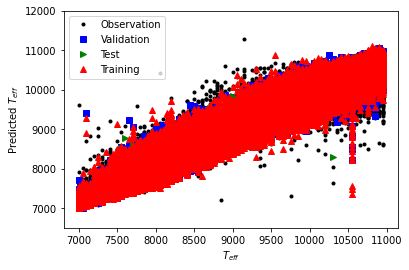

In [14]:

plt.plot(temp2,yobs2,'k.', label='Observation')
plt.plot(y_test,y_pred,'bs', label='Validation')
plt.plot(temp,yobs,'g>', label='Test')
plt.plot(y_train,y_hat,'r^', label='Training')

plt.xlabel("$T_{eff}$")
plt.ylabel("Predicted $T_{eff}$")
plt.legend()
plt.ylim((6500,12000))

plt.plot()
#plt.savefig("Figures/Teff-optimal-2.png",dpi=600)
plt.savefig("Figures/Teff-optimal-2.pdf")



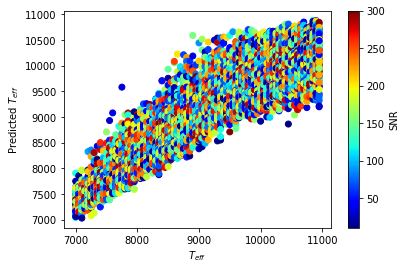

[421.50705]


In [9]:
#----Evaluation depending on S/N

Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
Xobs2 = Xobs2.reshape(list(Xobs2.shape) + [1])
yobs2=cnn.predict(Xobs2)
vsini2=[]
for i in np.arange(len(lst2)):
    vsini2.append(float(lst2[i][51:54]))
grav2=[]
for i in np.arange(len(lst2)):
    grav2.append(float(lst2[i][42:46]))

meta2=[]
for i in np.arange(len(lst2)):
    meta2.append(float(lst2[i][67:73]))
sn2=[]
for i in np.arange(len(lst2)):
    sn2.append(float(lst2[i][92:-4]))
temp2=np.array(temp2)
yobs2=np.array(yobs2)
sn2=np.array(sn2)
vsini2=np.array(vsini2)
grav2=np.array(grav2)
#_______________________
mask=(sn2>10)&(vsini2<301)&(temp2>=7000)&(grav2>=2.0)
#-------------------------

vin=temp2[mask]
ys=yobs2[mask]
c2=sn2[mask]
plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')

plt.xlabel("$T_{eff}$")
plt.ylabel("Predicted $T_{eff}$")
eval_obs2=0
for i in np.arange(len(vin)):
    eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
eval_obs2=eval_obs2/len(vin)
eval_obs2=eval_obs2**0.5

plt.show()
print(eval_obs2)

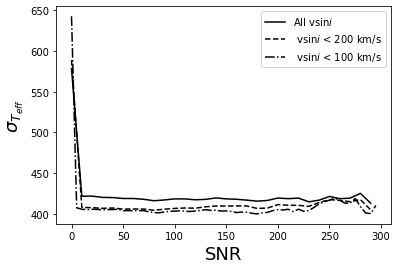

[410.1409]


In [10]:
inputs=[]
output=[]
for signal in range(0,300,10):
    mask=(sn2>signal)&(vsini2<301)&(temp2>=7000)&(grav2>=2.0)
    vin=temp2[mask]
    ys=yobs2[mask]
    c2=sn2[mask]
#    plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')

    #.legend('Observations with SNR>10')

    eval_obs2=0
    for i in np.arange(len(vin)):
        eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
    eval_obs2=eval_obs2/len(vin)
    eval_obs2=eval_obs2**0.5
    output.append(eval_obs2)
    inputs.append(signal)
plt.plot(inputs,output,'k',label='All v$\sin i$')

#___________________

inputs1=[]
output1=[]
for signal in range(0,300,10):
    mask=(sn2>signal)&(vsini2<201)&(temp2>=7000)&(grav2>=2.0)
    vin=temp2[mask]
    ys=yobs2[mask]
    c2=sn2[mask]
#    plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')

    #.legend('Observations with SNR>10')

    eval_obs2=0
    for i in np.arange(len(vin)):
        eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
    eval_obs2=eval_obs2/len(vin)
    eval_obs2=eval_obs2**0.5
    output1.append(eval_obs2)
    inputs1.append(signal)
plt.plot(inputs1,output1,'k--',label=' v$\sin i$ < 200 km/s')
#___________________

inputs2=[]
output2=[]
for signal in range(0,300,5):
    mask=(sn2>signal)&(vsini2<101)&(temp2>=7000)&(grav2>=2.0)
    vin=temp2[mask]
    ys=yobs2[mask]
    c2=sn2[mask]
#    plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')

    #.legend('Observations with SNR>10')

    eval_obs2=0
    for i in np.arange(len(vin)):
        eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
    eval_obs2=eval_obs2/len(vin)
    eval_obs2=eval_obs2**0.5
    output2.append(eval_obs2)
    inputs2.append(signal)
plt.plot(inputs2,output2,'k-.',label=' v$\sin i$ < 100 km/s')






plt.xlabel("SNR",fontsize=18)
plt.ylabel("$\sigma_{T_{eff}}$",fontsize=18)


plt.legend()
plt.savefig("Figures/Teff-SNR.png",dpi=600)
plt.savefig("Figures/Teff-SNR.pdf")

plt.show()
print(eval_obs2)


# Logg

In [16]:
kernel_initializer='he_normal'
loss_value='mean_squared_logarithmic_error'
optimizer_value='Adamax'
epochs_value=3000
batch_value=128
activation_function='tanh'
Dropout_values=0.3


y=np.zeros((len(p)))

for i in np.arange(len(p)):
    y[i]=logg[i]

y=y.reshape((y.shape[0],1))
out_dim=y.shape[1]
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
    #y=np.array(teff)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]

X = X.reshape(list(X.shape) + [1])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

cnn = Sequential()
cnn.add(layers.InputLayer(input_shape=X_train.shape[1:]))
cnn.add(layers.Conv1D(8, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(layers.Conv1D(4, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(layers.Conv1D(4, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
                                        #cnn.add(layers.MaxPooling1D(pool_size=4,strides=1, padding='valid'))
cnn.add(Flatten())
cnn.add(Dense(units = 1024, activation = activation_function,kernel_initializer=kernel_initializer))
cnn.add(Dense(units = 512, activation = activation_function))
cnn.add(Dense(units = 64, activation = activation_function))
cnn.add(Dense(units = 10, activation = activation_function))

cnn.add(Dense(units = out_dim, activation = 'linear'))
cnn.compile(loss=loss_value, optimizer=optimizer_value,metrics=["accuracy"])

history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs_value, batch_size=batch_value)



Targets have the dimension of  (127590, 1)
The features have the dimension of (127590, 50)
Train set: (102072, 50, 1) (102072, 1)
Test set: (25518, 50, 1) (25518, 1)
Epoch 1/3000
798/798 [==============================] - 5s 5ms/step - loss: 0.2493 - accuracy: 0.0000e+00 - val_loss: 0.0287 - val_accuracy: 0.0000e+00
Epoch 2/3000
798/798 [==============================] - 4s 5ms/step - loss: 0.0263 - accuracy: 0.0000e+00 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 3/3000
798/798 [==============================] - 4s 5ms/step - loss: 0.0116 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 4/3000
798/798 [==============================] - 5s 6ms/step - loss: 0.0071 - accuracy: 0.0000e+00 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 5/3000
798/798 [==============================] - 4s 5ms/step - loss: 0.0055 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 6/3000
798/798 [==============================] - ETA: 0s - loss: 0.

KeyboardInterrupt: 

In [88]:
# save model and architecture to single file
model_name="cnnlogg-TDB2.h5"
#cnn.save("cnnTeff.h5")
cnn.save(model_name)
print("Saved model to disk")



#cnn = load_model('cnnTeff-Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-200-logg2.00-5.00-0.20-vsini0-300-meta-1.50-1.50-0.20-Vmicr2.00-2.00-1.00-Resolution60000.h5')

Saved model to disk


In [32]:
from keras.models import load_model

model_name="cnnlogg-TDB2.h5"
cnn = load_model(model_name)

y=np.zeros((len(p)))

for i in np.arange(len(p)):
    y[i]=logg[i]

y=y.reshape((y.shape[0],1))
out_dim=y.shape[1]
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
    #y=np.array(teff)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]

X = X.reshape(list(X.shape) + [1])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, shuffle=True)





Targets have the dimension of  (63795, 1)
The features have the dimension of (63795, 50)


In [33]:
Xobs=rho
Xobs = preprocessing.StandardScaler().fit(Xobs).transform(Xobs.astype(float))
Xobs = Xobs.reshape(list(Xobs.shape) + [1])
yobs=cnn.predict(Xobs)

Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
Xobs2 = Xobs2.reshape(list(Xobs2.shape) + [1])
yobs2=cnn.predict(Xobs2)



y_hat = cnn.predict(X_train)
y_pred = cnn.predict(X_test)
yobs=cnn.predict(Xobs)
yobs2=cnn.predict(Xobs2)

eval_train_logg=(1/len(y_train))*((abs(y_hat-y_train)**2).sum())
eval_test_logg=(1/len(y_test))*((abs(y_pred-y_test)**2).sum())
eval_obs_logg=(1/len(grav))*((abs(yobs[:,0]-grav)**2).sum())
eval_obs2_logg=(1/len(grav2))*((abs(yobs2[:,0]-grav2)**2).sum())
eval_train_logg=eval_train_logg**0.5
eval_test_logg=eval_test_logg**0.5
eval_obs_logg=eval_obs_logg**0.5
eval_obs2_logg=eval_obs2_logg**0.5




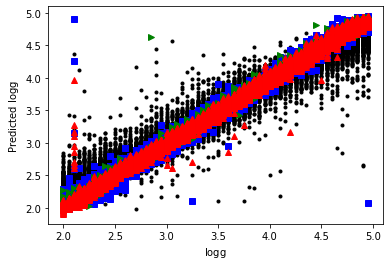

In [34]:


plt.plot(grav2,yobs2,'k.', label='Observation')
plt.plot(y_test,y_pred,'bs', label='Validation')
plt.plot(grav,yobs,'g>', label='Test')
plt.plot(y_train,y_hat,'r^', label='Training')

plt.xlabel("$\log$g")
plt.ylabel("Predicted $\log$g")
#plt.legend()

plt.plot()
plt.savefig("Figures/Logg-optimal.png",dpi=600)
plt.savefig("Figures/Logg-optimal.pdf")


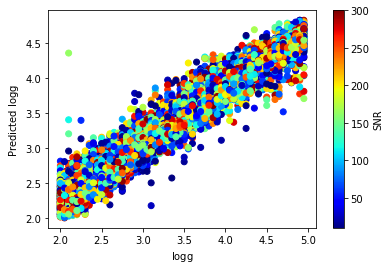

[0.2265263]


In [35]:
#-Evaluation-S/N
Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
Xobs2 = Xobs2.reshape(list(Xobs2.shape) + [1])
yobs2=cnn.predict(Xobs2)
vsini2=[]
for i in np.arange(len(lst2)):
    vsini2.append(float(lst2[i][51:54]))
grav2=[]
for i in np.arange(len(lst2)):
    grav2.append(float(lst2[i][42:46]))

meta2=[]
for i in np.arange(len(lst2)):
    meta2.append(float(lst2[i][67:73]))
sn2=[]
for i in np.arange(len(lst2)):
    sn2.append(float(lst2[i][92:-4]))
temp2=np.array(temp2)
yobs2=np.array(yobs2)
sn2=np.array(sn2)
vsini2=np.array(vsini2)
grav2=np.array(grav2)
#_______________________
mask=(sn2>10)&(vsini2<301)&(temp2>=7000)&(grav2>=2.0)
#-------------------------

vin=grav2[mask]
ys=yobs2[mask]
c2=sn2[mask]
plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')
plt.xlabel("$\log$g")
plt.ylabel("Predicted $\log$g")
eval_obs2=0
for i in np.arange(len(vin)):
    eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
eval_obs2=eval_obs2/len(vin)
eval_obs2=eval_obs2**0.5

plt.show()
print(eval_obs2)

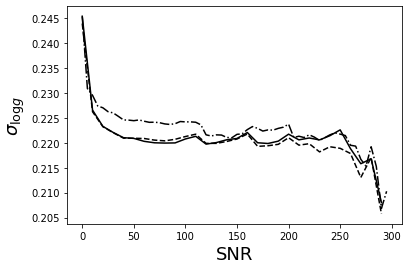

[0.21027224]


In [36]:
inputs=[]
output=[]
for signal in range(0,300,10):
    mask=(sn2>signal)&(vsini2<301)&(temp2>=7000)&(grav2>=2.0)
    vin=grav2[mask]
    ys=yobs2[mask]
    c2=sn2[mask]
#    plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')

    #.legend('Observations with SNR>10')

    eval_obs2=0
    for i in np.arange(len(vin)):
        eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
    eval_obs2=eval_obs2/len(vin)
    eval_obs2=eval_obs2**0.5
    output.append(eval_obs2)
    inputs.append(signal)
plt.plot(inputs,output,'k',label='All v$\sin i$')

#___________________

inputs1=[]
output1=[]
for signal in range(0,300,10):
    mask=(sn2>signal)&(vsini2<201)&(temp2>=7000)&(grav2>=2.0)
    vin=grav2[mask]
    ys=yobs2[mask]
    c2=sn2[mask]
#    plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')

    #.legend('Observations with SNR>10')

    eval_obs2=0
    for i in np.arange(len(vin)):
        eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
    eval_obs2=eval_obs2/len(vin)
    eval_obs2=eval_obs2**0.5
    output1.append(eval_obs2)
    inputs1.append(signal)
plt.plot(inputs1,output1,'k--',label=' v$\sin i$ < 200 km/s')
#___________________

inputs2=[]
output2=[]
for signal in range(0,300,5):
    mask=(sn2>signal)&(vsini2<101)&(temp2>=7000)&(grav2>=2.0)
    vin=grav2[mask]
    ys=yobs2[mask]
    c2=sn2[mask]
#    plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')

    #.legend('Observations with SNR>10')

    eval_obs2=0
    for i in np.arange(len(vin)):
        eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
    eval_obs2=eval_obs2/len(vin)
    eval_obs2=eval_obs2**0.5
    output2.append(eval_obs2)
    inputs2.append(signal)
plt.plot(inputs2,output2,'k-.',label=' v$\sin i$ < 100 km/s')






plt.xlabel("SNR",fontsize=18)
plt.ylabel("$\sigma_{\log g}$",fontsize=18)

plt.savefig("Figures/Logg-SNR.png",dpi=600)
plt.savefig("Figures/Logg-SNR.pdf")

#plt.legend()
plt.show()
print(eval_obs2)


# meta

In [63]:
kernel_initializer='RandomUniform'
loss_value='mean_absolute_error'
optimizer_value='Adam'
epochs_value=1000
batch_value=16
activation_function='tanh'
Dropout_values=0.2

y=np.zeros((len(p)))
for i in np.arange(len(p)):
    y[i]=metal[i]

y=y.reshape((y.shape[0],1))
out_dim=y.shape[1]
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]
X = X.reshape(list(X.shape) + [1])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
cnn = Sequential()
cnn.add(layers.InputLayer(input_shape=X_train.shape[1:]))
cnn.add(layers.Conv1D(8, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(layers.Conv1D(4, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(layers.Conv1D(4, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(Flatten())
cnn.add(Dense(units = 1024, activation = activation_function,kernel_initializer=kernel_initializer))
cnn.add(Dense(units = 512, activation = activation_function))
cnn.add(Dense(units = 64, activation = activation_function))
cnn.add(Dense(units = 10, activation = activation_function))
cnn.add(Dense(units = out_dim, activation = 'linear'))
cnn.compile(loss=loss_value, optimizer=optimizer_value,metrics=["accuracy"])

history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs_value, batch_size=batch_value)



Targets have the dimension of  (22011, 1)
The features have the dimension of (22011, 50)
Train set: (17608, 50, 1) (17608, 1)
Test set: (4403, 50, 1) (4403, 1)
Epoch 1/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.4650 - accuracy: 5.0935e-04 - val_loss: 0.1901 - val_accuracy: 6.8135e-04
Epoch 2/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.2177 - accuracy: 3.5913e-04 - val_loss: 0.1257 - val_accuracy: 6.8135e-04
Epoch 3/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.1811 - accuracy: 5.2627e-04 - val_loss: 0.1069 - val_accuracy: 6.8135e-04
Epoch 4/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.1576 - accuracy: 2.7986e-04 - val_loss: 0.1028 - val_accuracy: 6.8135e-04
Epoch 5/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.1444 - accuracy: 4.3155e-04 - val_loss: 0.0982 - val_accuracy: 6.8135e-04
Epoch 6/1000
1101/1101 [==============================] - 4s 3ms/step 

Epoch 53/1000
1101/1101 [==============================] - 4s 4ms/step - loss: 0.0789 - accuracy: 5.5869e-04 - val_loss: 0.0527 - val_accuracy: 6.8135e-04
Epoch 54/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0764 - accuracy: 2.5309e-04 - val_loss: 0.0549 - val_accuracy: 6.8135e-04
Epoch 55/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0767 - accuracy: 4.5790e-04 - val_loss: 0.0531 - val_accuracy: 6.8135e-04
Epoch 56/1000
1101/1101 [==============================] - 4s 4ms/step - loss: 0.0762 - accuracy: 5.7665e-04 - val_loss: 0.0525 - val_accuracy: 6.8135e-04
Epoch 57/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0771 - accuracy: 7.2532e-04 - val_loss: 0.0544 - val_accuracy: 6.8135e-04
Epoch 58/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0774 - accuracy: 3.0748e-04 - val_loss: 0.0532 - val_accuracy: 6.8135e-04
Epoch 59/1000
1101/1101 [==============================] - 4s 4ms/step

Epoch 106/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0744 - accuracy: 6.3234e-04 - val_loss: 0.0499 - val_accuracy: 6.8135e-04
Epoch 107/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0724 - accuracy: 6.7058e-04 - val_loss: 0.0533 - val_accuracy: 6.8135e-04
Epoch 108/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0739 - accuracy: 2.1576e-04 - val_loss: 0.0545 - val_accuracy: 6.8135e-04
Epoch 109/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0724 - accuracy: 6.0947e-04 - val_loss: 0.0555 - val_accuracy: 6.8135e-04
Epoch 110/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0746 - accuracy: 3.9983e-04 - val_loss: 0.0503 - val_accuracy: 6.8135e-04
Epoch 111/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0729 - accuracy: 6.8233e-04 - val_loss: 0.0485 - val_accuracy: 6.8135e-04
Epoch 112/1000
1101/1101 [==============================] - 4s 3

1101/1101 [==============================] - 4s 4ms/step - loss: 0.0717 - accuracy: 2.9251e-04 - val_loss: 0.0484 - val_accuracy: 6.8135e-04
Epoch 211/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0726 - accuracy: 9.6792e-04 - val_loss: 0.0482 - val_accuracy: 6.8135e-04
Epoch 212/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0726 - accuracy: 5.6168e-04 - val_loss: 0.0505 - val_accuracy: 6.8135e-04
Epoch 213/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0720 - accuracy: 4.9243e-04 - val_loss: 0.0510 - val_accuracy: 6.8135e-04
Epoch 214/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0720 - accuracy: 6.6034e-04 - val_loss: 0.0528 - val_accuracy: 6.8135e-04
Epoch 215/1000
1101/1101 [==============================] - 4s 4ms/step - loss: 0.0745 - accuracy: 6.4851e-04 - val_loss: 0.0526 - val_accuracy: 6.8135e-04
Epoch 216/1000
1101/1101 [==============================] - 4s 3ms/step - loss:

1101/1101 [==============================] - 4s 3ms/step - loss: 0.0715 - accuracy: 7.2536e-04 - val_loss: 0.0503 - val_accuracy: 6.8135e-04
Epoch 315/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0713 - accuracy: 3.7149e-04 - val_loss: 0.0520 - val_accuracy: 6.8135e-04
Epoch 316/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0715 - accuracy: 6.2158e-04 - val_loss: 0.0460 - val_accuracy: 6.8135e-04
Epoch 317/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0717 - accuracy: 3.6007e-04 - val_loss: 0.0505 - val_accuracy: 6.8135e-04
Epoch 318/1000
1101/1101 [==============================] - 4s 4ms/step - loss: 0.0717 - accuracy: 9.9766e-04 - val_loss: 0.0502 - val_accuracy: 6.8135e-04
Epoch 319/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0714 - accuracy: 7.2260e-04 - val_loss: 0.0502 - val_accuracy: 6.8135e-04
Epoch 320/1000
1101/1101 [==============================] - 4s 4ms/step - loss:

Epoch 367/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0714 - accuracy: 4.6601e-04 - val_loss: 0.0502 - val_accuracy: 6.8135e-04
Epoch 368/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0711 - accuracy: 5.9456e-04 - val_loss: 0.0533 - val_accuracy: 6.8135e-04
Epoch 369/1000
1101/1101 [==============================] - 4s 4ms/step - loss: 0.0729 - accuracy: 7.9213e-04 - val_loss: 0.0505 - val_accuracy: 6.8135e-04
Epoch 370/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0704 - accuracy: 5.9575e-04 - val_loss: 0.0490 - val_accuracy: 6.8135e-04
Epoch 371/1000
1101/1101 [==============================] - 4s 4ms/step - loss: 0.0704 - accuracy: 4.1949e-04 - val_loss: 0.0504 - val_accuracy: 6.8135e-04
Epoch 372/1000
1101/1101 [==============================] - 4s 4ms/step - loss: 0.0715 - accuracy: 6.0864e-04 - val_loss: 0.0539 - val_accuracy: 6.8135e-04
Epoch 373/1000
1101/1101 [==============================] - 4s 4

1101/1101 [==============================] - 4s 3ms/step - loss: 0.0724 - accuracy: 6.1499e-04 - val_loss: 0.0493 - val_accuracy: 6.8135e-04
Epoch 472/1000
1101/1101 [==============================] - 4s 4ms/step - loss: 0.0715 - accuracy: 7.2841e-04 - val_loss: 0.0500 - val_accuracy: 6.8135e-04
Epoch 473/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0745 - accuracy: 3.4812e-04 - val_loss: 0.0511 - val_accuracy: 6.8135e-04
Epoch 474/1000
1101/1101 [==============================] - 4s 4ms/step - loss: 0.0716 - accuracy: 9.5139e-04 - val_loss: 0.0510 - val_accuracy: 6.8135e-04
Epoch 475/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0715 - accuracy: 5.2073e-04 - val_loss: 0.0539 - val_accuracy: 6.8135e-04
Epoch 476/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0714 - accuracy: 6.6234e-04 - val_loss: 0.0533 - val_accuracy: 6.8135e-04
Epoch 477/1000
1101/1101 [==============================] - 4s 4ms/step - loss:

1101/1101 [==============================] - 4s 4ms/step - loss: 0.0723 - accuracy: 4.8583e-04 - val_loss: 0.0492 - val_accuracy: 6.8135e-04
Epoch 576/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0717 - accuracy: 6.2607e-04 - val_loss: 0.0516 - val_accuracy: 6.8135e-04
Epoch 577/1000
1101/1101 [==============================] - 4s 4ms/step - loss: 0.0710 - accuracy: 7.6849e-04 - val_loss: 0.0504 - val_accuracy: 6.8135e-04
Epoch 578/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0712 - accuracy: 8.4583e-04 - val_loss: 0.0473 - val_accuracy: 6.8135e-04
Epoch 579/1000
1101/1101 [==============================] - 4s 4ms/step - loss: 0.0713 - accuracy: 7.4774e-04 - val_loss: 0.0506 - val_accuracy: 6.8135e-04
Epoch 580/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0716 - accuracy: 3.1173e-04 - val_loss: 0.0510 - val_accuracy: 6.8135e-04
Epoch 581/1000
1101/1101 [==============================] - 4s 3ms/step - loss:

1101/1101 [==============================] - 4s 4ms/step - loss: 0.0734 - accuracy: 5.5792e-04 - val_loss: 0.0500 - val_accuracy: 6.8135e-04
Epoch 680/1000
1101/1101 [==============================] - 4s 4ms/step - loss: 0.0715 - accuracy: 3.4808e-04 - val_loss: 0.0503 - val_accuracy: 6.8135e-04
Epoch 681/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0718 - accuracy: 5.4977e-04 - val_loss: 0.0497 - val_accuracy: 6.8135e-04
Epoch 682/1000
1101/1101 [==============================] - 4s 4ms/step - loss: 0.0723 - accuracy: 6.1023e-04 - val_loss: 0.0534 - val_accuracy: 6.8135e-04
Epoch 683/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0735 - accuracy: 3.6056e-04 - val_loss: 0.0514 - val_accuracy: 6.8135e-04
Epoch 684/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0720 - accuracy: 3.6684e-04 - val_loss: 0.0552 - val_accuracy: 6.8135e-04
Epoch 685/1000
1101/1101 [==============================] - 4s 4ms/step - loss:

1101/1101 [==============================] - 4s 4ms/step - loss: 0.0745 - accuracy: 4.9763e-04 - val_loss: 0.0516 - val_accuracy: 6.8135e-04
Epoch 784/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0743 - accuracy: 2.9698e-04 - val_loss: 0.0514 - val_accuracy: 6.8135e-04
Epoch 785/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0746 - accuracy: 7.8549e-04 - val_loss: 0.0525 - val_accuracy: 6.8135e-04
Epoch 786/1000
1101/1101 [==============================] - 4s 4ms/step - loss: 0.0723 - accuracy: 5.4011e-04 - val_loss: 0.0516 - val_accuracy: 6.8135e-04
Epoch 787/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0732 - accuracy: 4.5750e-04 - val_loss: 0.0501 - val_accuracy: 6.8135e-04
Epoch 788/1000
1101/1101 [==============================] - 4s 4ms/step - loss: 0.0731 - accuracy: 6.5354e-04 - val_loss: 0.0530 - val_accuracy: 6.8135e-04
Epoch 789/1000
1101/1101 [==============================] - 4s 3ms/step - loss:

1101/1101 [==============================] - 3s 3ms/step - loss: 0.0729 - accuracy: 2.8728e-04 - val_loss: 0.0520 - val_accuracy: 6.8135e-04
Epoch 888/1000
1101/1101 [==============================] - 3s 3ms/step - loss: 0.0733 - accuracy: 6.9094e-04 - val_loss: 0.0540 - val_accuracy: 6.8135e-04
Epoch 889/1000
1101/1101 [==============================] - 3s 3ms/step - loss: 0.0762 - accuracy: 4.5269e-04 - val_loss: 0.0520 - val_accuracy: 6.8135e-04
Epoch 890/1000
1101/1101 [==============================] - 3s 3ms/step - loss: 0.0738 - accuracy: 4.1887e-04 - val_loss: 0.0531 - val_accuracy: 6.8135e-04
Epoch 891/1000
1101/1101 [==============================] - 3s 3ms/step - loss: 0.0742 - accuracy: 3.7997e-04 - val_loss: 0.0503 - val_accuracy: 6.8135e-04
Epoch 892/1000
1101/1101 [==============================] - 4s 3ms/step - loss: 0.0719 - accuracy: 6.8989e-04 - val_loss: 0.0520 - val_accuracy: 6.8135e-04
Epoch 893/1000
1101/1101 [==============================] - 4s 3ms/step - loss:

1101/1101 [==============================] - 3s 3ms/step - loss: 0.0726 - accuracy: 5.4700e-04 - val_loss: 0.0554 - val_accuracy: 6.8135e-04
Epoch 992/1000
1101/1101 [==============================] - 3s 3ms/step - loss: 0.0765 - accuracy: 5.8909e-04 - val_loss: 0.0550 - val_accuracy: 6.8135e-04
Epoch 993/1000
1101/1101 [==============================] - 3s 3ms/step - loss: 0.0750 - accuracy: 6.1582e-04 - val_loss: 0.0550 - val_accuracy: 6.8135e-04
Epoch 994/1000
1101/1101 [==============================] - 3s 3ms/step - loss: 0.0755 - accuracy: 3.6529e-04 - val_loss: 0.0533 - val_accuracy: 6.8135e-04
Epoch 995/1000
1101/1101 [==============================] - 3s 3ms/step - loss: 0.0735 - accuracy: 6.5765e-04 - val_loss: 0.0529 - val_accuracy: 6.8135e-04
Epoch 996/1000
1101/1101 [==============================] - 3s 3ms/step - loss: 0.0739 - accuracy: 7.1326e-04 - val_loss: 0.0521 - val_accuracy: 6.8135e-04
Epoch 997/1000
1101/1101 [==============================] - 3s 3ms/step - loss:

In [64]:
# save model and architecture to single file
model_name="cnnMeta-TDB1.h5"
#cnn.save("cnnTeff.h5")
cnn.save(model_name)
print("Saved model to disk")



#cnn = load_model('cnnTeff-Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-200-logg2.00-5.00-0.20-vsini0-300-meta-1.50-1.50-0.20-Vmicr2.00-2.00-1.00-Resolution60000.h5')

Saved model to disk


In [7]:
from keras.models import load_model

model_name="cnnMeta-TDB1.h5"
cnn = load_model(model_name)


y=np.zeros((len(p)))
for i in np.arange(len(p)):
    y[i]=metal[i]

y=y.reshape((y.shape[0],1))
out_dim=y.shape[1]
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]
X = X.reshape(list(X.shape) + [1])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, shuffle=True)

Targets have the dimension of  (22011, 1)
The features have the dimension of (22011, 50)


In [8]:
Xobs=rho
Xobs = preprocessing.StandardScaler().fit(Xobs).transform(Xobs.astype(float))
Xobs = Xobs.reshape(list(Xobs.shape) + [1])
yobs=cnn.predict(Xobs)

Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
Xobs2 = Xobs2.reshape(list(Xobs2.shape) + [1])
yobs2=cnn.predict(Xobs2)




y_hat = cnn.predict(X_train)
y_pred = cnn.predict(X_test)
yobs=cnn.predict(Xobs)
yobs2=cnn.predict(Xobs2)






eval_train_meta=(1/len(y_train))*((abs(y_hat-y_train)**2).sum())
eval_test_meta=(1/len(y_test))*((abs(y_pred-y_test)**2).sum())
eval_obs_meta=(1/len(meta))*((abs(yobs[:,0]-meta)**2).sum())
eval_obs2_meta=(1/len(meta2))*((abs(yobs2[:,0]-meta2)**2).sum())
eval_train_meta=eval_train_meta**0.5
eval_test_meta=eval_test_meta**0.5
eval_obs_meta=eval_obs_meta**0.5
eval_obs2_meta=eval_obs2_meta**0.5






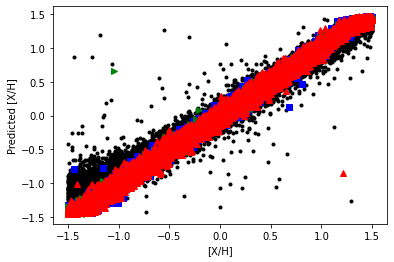

In [9]:



plt.plot(meta2,yobs2,'k.', label='Observation')
plt.plot(y_test,y_pred,'bs', label='Validation')
plt.plot(meta,yobs,'g>', label='Test')
plt.plot(y_train,y_hat,'r^', label='Training')

plt.xlabel("[X/H]")
plt.ylabel("Predicted [X/H]")
#plt.legend()

plt.plot()
plt.savefig("Figures/Meta-optimal.png",dpi=600)
plt.savefig("Figures/Meta-optimal.pdf")


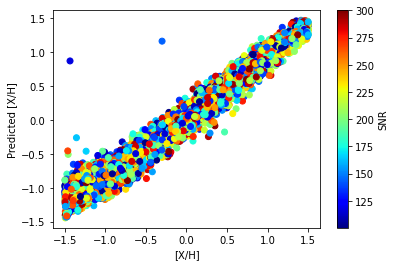

[0.1730905]


In [10]:


Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
Xobs2 = Xobs2.reshape(list(Xobs2.shape) + [1])
yobs2=cnn.predict(Xobs2)
vsini2=[]
for i in np.arange(len(lst2)):
    vsini2.append(float(lst2[i][51:54]))
grav2=[]
for i in np.arange(len(lst2)):
    grav2.append(float(lst2[i][42:46]))

meta2=[]
for i in np.arange(len(lst2)):
    meta2.append(float(lst2[i][67:73]))
sn2=[]
for i in np.arange(len(lst2)):
    sn2.append(float(lst2[i][92:-4]))
temp2=np.array(temp2)
yobs2=np.array(yobs2)
meta2=np.array(meta2)
sn2=np.array(sn2)
vsini2=np.array(vsini2)
grav2=np.array(grav2)
#_______________________
mask=(sn2>100)&(vsini2<301)&(temp2>=7000)&(grav2>=2.0)
#-------------------------

vin=meta2[mask]
ys=yobs2[mask]
c2=sn2[mask]
plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')

plt.xlabel("[X/H]")
plt.ylabel("Predicted [X/H]")
eval_obs2=0
for i in np.arange(len(vin)):
    eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
eval_obs2=eval_obs2/len(vin)
eval_obs2=eval_obs2**0.5

plt.show()
print(eval_obs2)



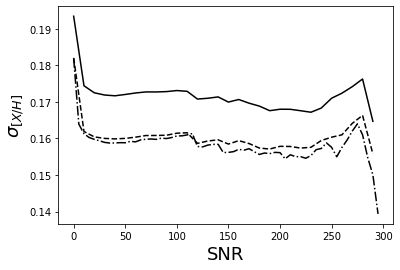

[0.13935782]


In [11]:
inputs=[]
output=[]
for signal in range(0,300,10):
    mask=(sn2>signal)&(vsini2<301)&(temp2>=7000)&(grav2>=2.0)
    vin=meta2[mask]
    ys=yobs2[mask]
    c2=sn2[mask]
#    plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')

    #.legend('Observations with SNR>10')

    eval_obs2=0
    for i in np.arange(len(vin)):
        eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
    eval_obs2=eval_obs2/len(vin)
    eval_obs2=eval_obs2**0.5
    output.append(eval_obs2)
    inputs.append(signal)
plt.plot(inputs,output,'k',label='All v$\sin i$')

#___________________

inputs1=[]
output1=[]
for signal in range(0,300,10):
    mask=(sn2>signal)&(vsini2<201)&(temp2>=7000)&(grav2>=2.0)
    vin=meta2[mask]
    ys=yobs2[mask]
    c2=sn2[mask]
#    plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')

    #.legend('Observations with SNR>10')

    eval_obs2=0
    for i in np.arange(len(vin)):
        eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
    eval_obs2=eval_obs2/len(vin)
    eval_obs2=eval_obs2**0.5
    output1.append(eval_obs2)
    inputs1.append(signal)
plt.plot(inputs1,output1,'k--',label=' v$\sin i$ < 200 km/s')
#___________________

inputs2=[]
output2=[]
for signal in range(0,300,5):
    mask=(sn2>signal)&(vsini2<101)&(temp2>=7000)&(grav2>=2.0)
    vin=meta2[mask]
    ys=yobs2[mask]
    c2=sn2[mask]
#    plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')

    #.legend('Observations with SNR>10')

    eval_obs2=0
    for i in np.arange(len(vin)):
        eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
    eval_obs2=eval_obs2/len(vin)
    eval_obs2=eval_obs2**0.5
    output2.append(eval_obs2)
    inputs2.append(signal)
plt.plot(inputs2,output2,'k-.',label=' v$\sin i$ < 100 km/s')






plt.xlabel("SNR",fontsize=18)
plt.ylabel("$\sigma_{ [X/H]}$",fontsize=18)
plt.savefig("Figures/Meta-SNR.png",dpi=600)
plt.savefig("Figures/Meta-SNR.pdf")


#plt.legend()
plt.show()
print(eval_obs2)


# vsini

In [26]:
kernel_initializer='he_uniform'
loss_value='mean_squared_error'
optimizer_value='Adamax'
epochs_value=3000
batch_value=32
activation_function='tanh'
Dropout_values=0.3

y=np.zeros((len(p)))
for i in np.arange(len(p)):
    y[i]=vrot[i]


y=y.reshape((y.shape[0],1))
out_dim=y.shape[1]
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]

X = X.reshape(list(X.shape) + [1])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

cnn = Sequential()
cnn.add(layers.InputLayer(input_shape=X_train.shape[1:]))
cnn.add(layers.Conv1D(8, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(layers.Conv1D(4, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(layers.Conv1D(4, kernel_size=4, activation=activation_function, padding="same"))
cnn.add(Dropout(Dropout_values))
cnn.add(Flatten())
cnn.add(Dense(units = 1024, activation = activation_function,kernel_initializer=kernel_initializer))
cnn.add(Dense(units = 512, activation = activation_function))
cnn.add(Dense(units = 64, activation = activation_function))
cnn.add(Dense(units = 10, activation = activation_function))
cnn.add(Dense(units = out_dim, activation = 'linear'))
cnn.compile(loss=loss_value, optimizer=optimizer_value,metrics=["accuracy"])

history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs_value, batch_size=batch_value)


Targets have the dimension of  (22011, 1)
The features have the dimension of (22011, 50)
Train set: (17608, 50, 1) (17608, 1)
Test set: (4403, 50, 1) (4403, 1)
Epoch 1/3000
551/551 [==============================] - 23s 7ms/step - loss: 20139.7953 - accuracy: 0.0063 - val_loss: 19684.2012 - val_accuracy: 0.0055
Epoch 2/3000
551/551 [==============================] - 3s 5ms/step - loss: 19147.5453 - accuracy: 0.0065 - val_loss: 18744.8301 - val_accuracy: 0.0055
Epoch 3/3000
551/551 [==============================] - 3s 6ms/step - loss: 18387.2394 - accuracy: 0.0062 - val_loss: 17873.6484 - val_accuracy: 0.0055
Epoch 4/3000
551/551 [==============================] - 3s 5ms/step - loss: 17207.9390 - accuracy: 0.0061 - val_loss: 16987.7363 - val_accuracy: 0.0066
Epoch 5/3000
551/551 [==============================] - 3s 5ms/step - loss: 16700.7626 - accuracy: 0.0059 - val_loss: 16153.8916 - val_accuracy: 0.0055
Epoch 6/3000
551/551 [==============================] - 3s 5ms/step - loss: 155

551/551 [==============================] - 2s 4ms/step - loss: 762.4820 - accuracy: 0.0066 - val_loss: 745.9935 - val_accuracy: 0.0068
Epoch 55/3000
551/551 [==============================] - 2s 4ms/step - loss: 697.7236 - accuracy: 0.0074 - val_loss: 681.6993 - val_accuracy: 0.0061
Epoch 56/3000
551/551 [==============================] - 3s 6ms/step - loss: 656.8026 - accuracy: 0.0065 - val_loss: 621.5322 - val_accuracy: 0.0061
Epoch 57/3000
551/551 [==============================] - 3s 5ms/step - loss: 602.2800 - accuracy: 0.0068 - val_loss: 575.3005 - val_accuracy: 0.0068
Epoch 58/3000
551/551 [==============================] - 3s 6ms/step - loss: 582.1260 - accuracy: 0.0062 - val_loss: 522.6113 - val_accuracy: 0.0068
Epoch 59/3000
551/551 [==============================] - 3s 5ms/step - loss: 509.7676 - accuracy: 0.0062 - val_loss: 477.3085 - val_accuracy: 0.0064
Epoch 60/3000
551/551 [==============================] - 3s 6ms/step - loss: 431.6951 - accuracy: 0.0072 - val_loss: 433

551/551 [==============================] - 3s 5ms/step - loss: 13.7468 - accuracy: 0.0077 - val_loss: 12.2671 - val_accuracy: 0.0057
Epoch 165/3000
551/551 [==============================] - 3s 5ms/step - loss: 14.8171 - accuracy: 0.0047 - val_loss: 12.5621 - val_accuracy: 0.0057
Epoch 166/3000
551/551 [==============================] - 3s 5ms/step - loss: 15.1517 - accuracy: 0.0061 - val_loss: 11.5887 - val_accuracy: 0.0070
Epoch 167/3000
551/551 [==============================] - 3s 5ms/step - loss: 14.1615 - accuracy: 0.0057 - val_loss: 12.7154 - val_accuracy: 0.0066
Epoch 168/3000
551/551 [==============================] - 3s 5ms/step - loss: 15.2291 - accuracy: 0.0069 - val_loss: 13.0830 - val_accuracy: 0.0059
Epoch 169/3000
551/551 [==============================] - 3s 5ms/step - loss: 14.5592 - accuracy: 0.0063 - val_loss: 13.7468 - val_accuracy: 0.0064
Epoch 170/3000
551/551 [==============================] - 3s 5ms/step - loss: 14.4882 - accuracy: 0.0067 - val_loss: 11.9012 - 

551/551 [==============================] - 2s 4ms/step - loss: 10.9530 - accuracy: 0.0062 - val_loss: 11.8342 - val_accuracy: 0.0068
Epoch 275/3000
551/551 [==============================] - 2s 4ms/step - loss: 11.2912 - accuracy: 0.0051 - val_loss: 11.4927 - val_accuracy: 0.0073
Epoch 276/3000
551/551 [==============================] - 2s 3ms/step - loss: 10.9859 - accuracy: 0.0062 - val_loss: 11.8070 - val_accuracy: 0.0070
Epoch 277/3000
551/551 [==============================] - 2s 4ms/step - loss: 10.7330 - accuracy: 0.0066 - val_loss: 11.7235 - val_accuracy: 0.0073
Epoch 278/3000
551/551 [==============================] - 2s 3ms/step - loss: 10.9214 - accuracy: 0.0076 - val_loss: 11.5993 - val_accuracy: 0.0064
Epoch 279/3000
551/551 [==============================] - 2s 4ms/step - loss: 10.9319 - accuracy: 0.0064 - val_loss: 11.5098 - val_accuracy: 0.0055
Epoch 280/3000
551/551 [==============================] - 2s 4ms/step - loss: 10.5300 - accuracy: 0.0063 - val_loss: 12.5959 - 

Epoch 385/3000
551/551 [==============================] - 4s 8ms/step - loss: 9.3082 - accuracy: 0.0050 - val_loss: 12.1991 - val_accuracy: 0.0073
Epoch 386/3000
551/551 [==============================] - 4s 8ms/step - loss: 9.7595 - accuracy: 0.0072 - val_loss: 12.3783 - val_accuracy: 0.0068
Epoch 387/3000
551/551 [==============================] - 4s 7ms/step - loss: 9.6780 - accuracy: 0.0061 - val_loss: 11.8202 - val_accuracy: 0.0073
Epoch 388/3000
551/551 [==============================] - 4s 8ms/step - loss: 9.5596 - accuracy: 0.0060 - val_loss: 11.4125 - val_accuracy: 0.0070
Epoch 389/3000
551/551 [==============================] - 4s 7ms/step - loss: 9.5184 - accuracy: 0.0053 - val_loss: 11.7987 - val_accuracy: 0.0075
Epoch 390/3000
551/551 [==============================] - 3s 6ms/step - loss: 9.8821 - accuracy: 0.0079 - val_loss: 11.9998 - val_accuracy: 0.0055
Epoch 391/3000
551/551 [==============================] - 4s 7ms/step - loss: 9.6532 - accuracy: 0.0060 - val_loss: 11

Epoch 441/3000
551/551 [==============================] - 4s 8ms/step - loss: 9.2285 - accuracy: 0.0080 - val_loss: 11.8446 - val_accuracy: 0.0061
Epoch 442/3000
551/551 [==============================] - 4s 7ms/step - loss: 9.0572 - accuracy: 0.0064 - val_loss: 12.5596 - val_accuracy: 0.0068
Epoch 443/3000
551/551 [==============================] - 4s 8ms/step - loss: 9.1967 - accuracy: 0.0075 - val_loss: 11.6536 - val_accuracy: 0.0057
Epoch 444/3000
551/551 [==============================] - 4s 8ms/step - loss: 8.7023 - accuracy: 0.0069 - val_loss: 12.1326 - val_accuracy: 0.0052
Epoch 445/3000
551/551 [==============================] - 4s 8ms/step - loss: 8.7623 - accuracy: 0.0070 - val_loss: 12.0739 - val_accuracy: 0.0050
Epoch 446/3000
551/551 [==============================] - 4s 8ms/step - loss: 8.9914 - accuracy: 0.0060 - val_loss: 11.2537 - val_accuracy: 0.0055
Epoch 447/3000
551/551 [==============================] - 4s 7ms/step - loss: 9.0230 - accuracy: 0.0069 - val_loss: 11

Epoch 497/3000
551/551 [==============================] - 3s 6ms/step - loss: 8.6507 - accuracy: 0.0068 - val_loss: 12.0013 - val_accuracy: 0.0073
Epoch 498/3000
551/551 [==============================] - 4s 8ms/step - loss: 8.5026 - accuracy: 0.0071 - val_loss: 13.2489 - val_accuracy: 0.0055
Epoch 499/3000
551/551 [==============================] - 3s 6ms/step - loss: 8.4917 - accuracy: 0.0073 - val_loss: 11.9962 - val_accuracy: 0.0064
Epoch 500/3000
551/551 [==============================] - 4s 8ms/step - loss: 8.4129 - accuracy: 0.0067 - val_loss: 11.5904 - val_accuracy: 0.0068
Epoch 501/3000
551/551 [==============================] - 3s 6ms/step - loss: 8.4306 - accuracy: 0.0065 - val_loss: 11.4522 - val_accuracy: 0.0077
Epoch 502/3000
551/551 [==============================] - 3s 6ms/step - loss: 8.8227 - accuracy: 0.0058 - val_loss: 11.9458 - val_accuracy: 0.0061
Epoch 503/3000
551/551 [==============================] - 3s 6ms/step - loss: 8.8300 - accuracy: 0.0058 - val_loss: 11

Epoch 553/3000
551/551 [==============================] - 3s 6ms/step - loss: 8.4528 - accuracy: 0.0076 - val_loss: 11.9668 - val_accuracy: 0.0068
Epoch 554/3000
551/551 [==============================] - 3s 6ms/step - loss: 7.8829 - accuracy: 0.0064 - val_loss: 12.3139 - val_accuracy: 0.0055
Epoch 555/3000
551/551 [==============================] - 3s 6ms/step - loss: 8.3412 - accuracy: 0.0069 - val_loss: 12.3306 - val_accuracy: 0.0055
Epoch 556/3000
551/551 [==============================] - 3s 5ms/step - loss: 7.9409 - accuracy: 0.0073 - val_loss: 11.5242 - val_accuracy: 0.0061
Epoch 557/3000
551/551 [==============================] - 3s 5ms/step - loss: 8.1348 - accuracy: 0.0073 - val_loss: 11.4893 - val_accuracy: 0.0068
Epoch 558/3000
551/551 [==============================] - 4s 8ms/step - loss: 8.1698 - accuracy: 0.0063 - val_loss: 11.7778 - val_accuracy: 0.0055
Epoch 559/3000
551/551 [==============================] - 3s 6ms/step - loss: 7.8462 - accuracy: 0.0068 - val_loss: 11

Epoch 609/3000
551/551 [==============================] - 3s 5ms/step - loss: 7.7255 - accuracy: 0.0070 - val_loss: 11.7404 - val_accuracy: 0.0055
Epoch 610/3000
551/551 [==============================] - 4s 8ms/step - loss: 7.7610 - accuracy: 0.0058 - val_loss: 11.9592 - val_accuracy: 0.0061
Epoch 611/3000
551/551 [==============================] - 3s 5ms/step - loss: 8.3560 - accuracy: 0.0072 - val_loss: 12.1736 - val_accuracy: 0.0055
Epoch 612/3000
551/551 [==============================] - 3s 6ms/step - loss: 8.5515 - accuracy: 0.0069 - val_loss: 11.3410 - val_accuracy: 0.0057
Epoch 613/3000
551/551 [==============================] - 3s 6ms/step - loss: 7.4573 - accuracy: 0.0066 - val_loss: 12.3844 - val_accuracy: 0.0055
Epoch 614/3000
551/551 [==============================] - 4s 6ms/step - loss: 7.7126 - accuracy: 0.0076 - val_loss: 11.8626 - val_accuracy: 0.0055
Epoch 615/3000
551/551 [==============================] - 4s 7ms/step - loss: 8.0299 - accuracy: 0.0071 - val_loss: 11

Epoch 665/3000
551/551 [==============================] - 3s 5ms/step - loss: 7.5712 - accuracy: 0.0068 - val_loss: 11.8037 - val_accuracy: 0.0055
Epoch 666/3000
551/551 [==============================] - 3s 5ms/step - loss: 7.6779 - accuracy: 0.0062 - val_loss: 12.3532 - val_accuracy: 0.0055
Epoch 667/3000
551/551 [==============================] - 3s 5ms/step - loss: 7.4642 - accuracy: 0.0074 - val_loss: 12.0115 - val_accuracy: 0.0070
Epoch 668/3000
551/551 [==============================] - 3s 5ms/step - loss: 7.9607 - accuracy: 0.0072 - val_loss: 11.6842 - val_accuracy: 0.0064
Epoch 669/3000
551/551 [==============================] - 4s 7ms/step - loss: 7.4615 - accuracy: 0.0067 - val_loss: 11.8131 - val_accuracy: 0.0064
Epoch 670/3000
551/551 [==============================] - 2s 4ms/step - loss: 7.5521 - accuracy: 0.0072 - val_loss: 11.8256 - val_accuracy: 0.0055
Epoch 671/3000
551/551 [==============================] - 3s 6ms/step - loss: 7.1083 - accuracy: 0.0060 - val_loss: 11

Epoch 721/3000
551/551 [==============================] - 3s 5ms/step - loss: 7.4643 - accuracy: 0.0068 - val_loss: 11.7000 - val_accuracy: 0.0075
Epoch 722/3000
551/551 [==============================] - 3s 5ms/step - loss: 7.1766 - accuracy: 0.0074 - val_loss: 11.8220 - val_accuracy: 0.0064
Epoch 723/3000
551/551 [==============================] - 3s 5ms/step - loss: 7.1273 - accuracy: 0.0086 - val_loss: 12.1249 - val_accuracy: 0.0064
Epoch 724/3000
551/551 [==============================] - 3s 5ms/step - loss: 6.8490 - accuracy: 0.0072 - val_loss: 12.1428 - val_accuracy: 0.0055
Epoch 725/3000
551/551 [==============================] - 3s 5ms/step - loss: 7.3486 - accuracy: 0.0073 - val_loss: 11.7584 - val_accuracy: 0.0064
Epoch 726/3000
551/551 [==============================] - 3s 5ms/step - loss: 7.4078 - accuracy: 0.0069 - val_loss: 11.9441 - val_accuracy: 0.0075
Epoch 727/3000
551/551 [==============================] - 3s 5ms/step - loss: 7.0943 - accuracy: 0.0069 - val_loss: 12

Epoch 777/3000
551/551 [==============================] - 3s 5ms/step - loss: 7.1002 - accuracy: 0.0064 - val_loss: 12.5140 - val_accuracy: 0.0075
Epoch 778/3000
551/551 [==============================] - 3s 5ms/step - loss: 7.1014 - accuracy: 0.0078 - val_loss: 12.2153 - val_accuracy: 0.0055
Epoch 779/3000
551/551 [==============================] - 3s 5ms/step - loss: 6.4453 - accuracy: 0.0071 - val_loss: 12.4305 - val_accuracy: 0.0055
Epoch 780/3000
551/551 [==============================] - 3s 6ms/step - loss: 7.0800 - accuracy: 0.0071 - val_loss: 12.1799 - val_accuracy: 0.0052
Epoch 781/3000
551/551 [==============================] - 3s 6ms/step - loss: 7.0816 - accuracy: 0.0062 - val_loss: 11.9167 - val_accuracy: 0.0055
Epoch 782/3000
551/551 [==============================] - 3s 6ms/step - loss: 7.2543 - accuracy: 0.0070 - val_loss: 12.2518 - val_accuracy: 0.0070
Epoch 783/3000
551/551 [==============================] - 3s 6ms/step - loss: 6.9402 - accuracy: 0.0065 - val_loss: 12

Epoch 833/3000
551/551 [==============================] - 3s 5ms/step - loss: 7.0711 - accuracy: 0.0063 - val_loss: 12.4205 - val_accuracy: 0.0084
Epoch 834/3000
551/551 [==============================] - 3s 5ms/step - loss: 7.3721 - accuracy: 0.0083 - val_loss: 13.0298 - val_accuracy: 0.0057
Epoch 835/3000
551/551 [==============================] - 3s 5ms/step - loss: 7.2101 - accuracy: 0.0067 - val_loss: 12.4714 - val_accuracy: 0.0057
Epoch 836/3000
551/551 [==============================] - 3s 5ms/step - loss: 6.7879 - accuracy: 0.0085 - val_loss: 12.3502 - val_accuracy: 0.0077
Epoch 837/3000
551/551 [==============================] - 3s 5ms/step - loss: 7.0034 - accuracy: 0.0059 - val_loss: 13.1654 - val_accuracy: 0.0059
Epoch 838/3000
551/551 [==============================] - 3s 5ms/step - loss: 6.5745 - accuracy: 0.0062 - val_loss: 12.8905 - val_accuracy: 0.0055
Epoch 839/3000
551/551 [==============================] - 3s 6ms/step - loss: 7.2720 - accuracy: 0.0068 - val_loss: 12

Epoch 889/3000
551/551 [==============================] - 3s 5ms/step - loss: 7.1034 - accuracy: 0.0069 - val_loss: 12.1560 - val_accuracy: 0.0073
Epoch 890/3000
551/551 [==============================] - 2s 4ms/step - loss: 6.4786 - accuracy: 0.0075 - val_loss: 12.7564 - val_accuracy: 0.0061
Epoch 891/3000
551/551 [==============================] - 3s 5ms/step - loss: 6.8762 - accuracy: 0.0069 - val_loss: 12.2875 - val_accuracy: 0.0055
Epoch 892/3000
551/551 [==============================] - 3s 5ms/step - loss: 6.6069 - accuracy: 0.0085 - val_loss: 12.5336 - val_accuracy: 0.0052
Epoch 893/3000
551/551 [==============================] - 3s 5ms/step - loss: 6.8309 - accuracy: 0.0073 - val_loss: 12.2763 - val_accuracy: 0.0077
Epoch 894/3000
551/551 [==============================] - 3s 5ms/step - loss: 6.5195 - accuracy: 0.0065 - val_loss: 12.0934 - val_accuracy: 0.0055
Epoch 895/3000
551/551 [==============================] - 3s 5ms/step - loss: 6.8088 - accuracy: 0.0068 - val_loss: 12

Epoch 945/3000
551/551 [==============================] - 4s 7ms/step - loss: 6.6390 - accuracy: 0.0064 - val_loss: 12.6219 - val_accuracy: 0.0064
Epoch 946/3000
551/551 [==============================] - 3s 5ms/step - loss: 6.2892 - accuracy: 0.0068 - val_loss: 12.3635 - val_accuracy: 0.0061
Epoch 947/3000
551/551 [==============================] - 3s 6ms/step - loss: 6.4670 - accuracy: 0.0074 - val_loss: 13.3024 - val_accuracy: 0.0075
Epoch 948/3000
551/551 [==============================] - 4s 7ms/step - loss: 6.3022 - accuracy: 0.0075 - val_loss: 12.8939 - val_accuracy: 0.0061
Epoch 949/3000
551/551 [==============================] - 4s 7ms/step - loss: 6.1450 - accuracy: 0.0065 - val_loss: 12.6596 - val_accuracy: 0.0070
Epoch 950/3000
551/551 [==============================] - 4s 7ms/step - loss: 6.8270 - accuracy: 0.0070 - val_loss: 12.4775 - val_accuracy: 0.0057
Epoch 951/3000
551/551 [==============================] - 4s 7ms/step - loss: 6.3029 - accuracy: 0.0060 - val_loss: 12

Epoch 1001/3000
551/551 [==============================] - 3s 5ms/step - loss: 6.3676 - accuracy: 0.0071 - val_loss: 12.2620 - val_accuracy: 0.0073
Epoch 1002/3000
551/551 [==============================] - 3s 6ms/step - loss: 6.1131 - accuracy: 0.0082 - val_loss: 12.7903 - val_accuracy: 0.0057
Epoch 1003/3000
551/551 [==============================] - 3s 5ms/step - loss: 6.7931 - accuracy: 0.0077 - val_loss: 12.4629 - val_accuracy: 0.0057
Epoch 1004/3000
551/551 [==============================] - 4s 7ms/step - loss: 6.5618 - accuracy: 0.0066 - val_loss: 13.0968 - val_accuracy: 0.0082
Epoch 1005/3000
551/551 [==============================] - 4s 7ms/step - loss: 6.3902 - accuracy: 0.0080 - val_loss: 12.9318 - val_accuracy: 0.0070
Epoch 1006/3000
551/551 [==============================] - 3s 5ms/step - loss: 6.4058 - accuracy: 0.0071 - val_loss: 12.9077 - val_accuracy: 0.0059
Epoch 1007/3000
551/551 [==============================] - 3s 5ms/step - loss: 6.2107 - accuracy: 0.0073 - val_l

551/551 [==============================] - 4s 8ms/step - loss: 5.6661 - accuracy: 0.0069 - val_loss: 13.0503 - val_accuracy: 0.0061
Epoch 1112/3000
551/551 [==============================] - 4s 8ms/step - loss: 6.0536 - accuracy: 0.0076 - val_loss: 12.8977 - val_accuracy: 0.0057
Epoch 1113/3000
551/551 [==============================] - 4s 8ms/step - loss: 6.0077 - accuracy: 0.0072 - val_loss: 13.0859 - val_accuracy: 0.0061
Epoch 1114/3000
551/551 [==============================] - 4s 8ms/step - loss: 6.1433 - accuracy: 0.0082 - val_loss: 13.1838 - val_accuracy: 0.0064
Epoch 1115/3000
551/551 [==============================] - 4s 7ms/step - loss: 5.6885 - accuracy: 0.0077 - val_loss: 13.0755 - val_accuracy: 0.0052
Epoch 1116/3000
551/551 [==============================] - 4s 8ms/step - loss: 5.7866 - accuracy: 0.0065 - val_loss: 13.3114 - val_accuracy: 0.0061
Epoch 1117/3000
551/551 [==============================] - 4s 8ms/step - loss: 6.0385 - accuracy: 0.0085 - val_loss: 13.4365 - v

551/551 [==============================] - 4s 8ms/step - loss: 5.4452 - accuracy: 0.0070 - val_loss: 13.0764 - val_accuracy: 0.0059
Epoch 1222/3000
551/551 [==============================] - 4s 8ms/step - loss: 5.9881 - accuracy: 0.0064 - val_loss: 13.0667 - val_accuracy: 0.0068
Epoch 1223/3000
551/551 [==============================] - 4s 8ms/step - loss: 5.9105 - accuracy: 0.0069 - val_loss: 12.9387 - val_accuracy: 0.0059
Epoch 1224/3000
551/551 [==============================] - 4s 8ms/step - loss: 5.6862 - accuracy: 0.0076 - val_loss: 13.3879 - val_accuracy: 0.0061
Epoch 1225/3000
551/551 [==============================] - 4s 7ms/step - loss: 6.1256 - accuracy: 0.0071 - val_loss: 13.0670 - val_accuracy: 0.0073
Epoch 1226/3000
551/551 [==============================] - 3s 5ms/step - loss: 5.9996 - accuracy: 0.0059 - val_loss: 13.1593 - val_accuracy: 0.0070
Epoch 1227/3000
551/551 [==============================] - 4s 7ms/step - loss: 5.7715 - accuracy: 0.0069 - val_loss: 13.1091 - v

551/551 [==============================] - 4s 7ms/step - loss: 5.5951 - accuracy: 0.0074 - val_loss: 13.2315 - val_accuracy: 0.0064
Epoch 1332/3000
551/551 [==============================] - 4s 8ms/step - loss: 5.5952 - accuracy: 0.0073 - val_loss: 13.2281 - val_accuracy: 0.0077
Epoch 1333/3000
551/551 [==============================] - 4s 8ms/step - loss: 5.3071 - accuracy: 0.0075 - val_loss: 13.4775 - val_accuracy: 0.0061
Epoch 1334/3000
551/551 [==============================] - 4s 7ms/step - loss: 5.6414 - accuracy: 0.0079 - val_loss: 13.2764 - val_accuracy: 0.0055
Epoch 1335/3000
551/551 [==============================] - 4s 8ms/step - loss: 5.4895 - accuracy: 0.0091 - val_loss: 13.7154 - val_accuracy: 0.0075
Epoch 1336/3000
551/551 [==============================] - 4s 8ms/step - loss: 5.3401 - accuracy: 0.0077 - val_loss: 13.4413 - val_accuracy: 0.0064
Epoch 1337/3000
551/551 [==============================] - 4s 8ms/step - loss: 5.2295 - accuracy: 0.0069 - val_loss: 13.1450 - v

551/551 [==============================] - 4s 7ms/step - loss: 5.0686 - accuracy: 0.0069 - val_loss: 13.5446 - val_accuracy: 0.0077
Epoch 1442/3000
551/551 [==============================] - 4s 7ms/step - loss: 5.1994 - accuracy: 0.0081 - val_loss: 13.1382 - val_accuracy: 0.0077
Epoch 1443/3000
551/551 [==============================] - 4s 8ms/step - loss: 5.0228 - accuracy: 0.0085 - val_loss: 13.4501 - val_accuracy: 0.0066
Epoch 1444/3000
551/551 [==============================] - 4s 8ms/step - loss: 4.9244 - accuracy: 0.0080 - val_loss: 13.6867 - val_accuracy: 0.0059
Epoch 1445/3000
551/551 [==============================] - 4s 8ms/step - loss: 5.2491 - accuracy: 0.0071 - val_loss: 13.6484 - val_accuracy: 0.0064
Epoch 1446/3000
551/551 [==============================] - 4s 7ms/step - loss: 5.3034 - accuracy: 0.0076 - val_loss: 13.5638 - val_accuracy: 0.0057
Epoch 1447/3000
551/551 [==============================] - 4s 7ms/step - loss: 5.4410 - accuracy: 0.0081 - val_loss: 13.4346 - v

551/551 [==============================] - 3s 5ms/step - loss: 5.4595 - accuracy: 0.0065 - val_loss: 13.3273 - val_accuracy: 0.0066
Epoch 1552/3000
551/551 [==============================] - 3s 5ms/step - loss: 5.0308 - accuracy: 0.0070 - val_loss: 13.7394 - val_accuracy: 0.0068
Epoch 1553/3000
551/551 [==============================] - 3s 5ms/step - loss: 5.2126 - accuracy: 0.0072 - val_loss: 13.3697 - val_accuracy: 0.0061
Epoch 1554/3000
551/551 [==============================] - 3s 5ms/step - loss: 5.0426 - accuracy: 0.0075 - val_loss: 13.8118 - val_accuracy: 0.0077
Epoch 1555/3000
551/551 [==============================] - 3s 5ms/step - loss: 4.8630 - accuracy: 0.0068 - val_loss: 14.0041 - val_accuracy: 0.0055
Epoch 1556/3000
551/551 [==============================] - 3s 6ms/step - loss: 4.8572 - accuracy: 0.0079 - val_loss: 13.4436 - val_accuracy: 0.0082
Epoch 1557/3000
551/551 [==============================] - 3s 5ms/step - loss: 5.2701 - accuracy: 0.0081 - val_loss: 13.2303 - v

551/551 [==============================] - 4s 6ms/step - loss: 5.1480 - accuracy: 0.0079 - val_loss: 14.3501 - val_accuracy: 0.0070
Epoch 1662/3000
551/551 [==============================] - 4s 7ms/step - loss: 4.7147 - accuracy: 0.0063 - val_loss: 13.6689 - val_accuracy: 0.0077
Epoch 1663/3000
551/551 [==============================] - 4s 8ms/step - loss: 4.9646 - accuracy: 0.0077 - val_loss: 14.1758 - val_accuracy: 0.0079
Epoch 1664/3000
551/551 [==============================] - 4s 7ms/step - loss: 4.7986 - accuracy: 0.0069 - val_loss: 13.9731 - val_accuracy: 0.0055
Epoch 1665/3000
551/551 [==============================] - 4s 7ms/step - loss: 4.8617 - accuracy: 0.0072 - val_loss: 14.1329 - val_accuracy: 0.0059
Epoch 1666/3000
551/551 [==============================] - 4s 7ms/step - loss: 5.1516 - accuracy: 0.0078 - val_loss: 13.8221 - val_accuracy: 0.0059
Epoch 1667/3000
551/551 [==============================] - 4s 7ms/step - loss: 4.6284 - accuracy: 0.0078 - val_loss: 13.9283 - v

551/551 [==============================] - 4s 7ms/step - loss: 4.8919 - accuracy: 0.0063 - val_loss: 13.9488 - val_accuracy: 0.0057
Epoch 1772/3000
551/551 [==============================] - 4s 8ms/step - loss: 4.8039 - accuracy: 0.0071 - val_loss: 14.5042 - val_accuracy: 0.0057
Epoch 1773/3000
551/551 [==============================] - 4s 7ms/step - loss: 4.6632 - accuracy: 0.0059 - val_loss: 14.3313 - val_accuracy: 0.0073
Epoch 1774/3000
551/551 [==============================] - 4s 7ms/step - loss: 4.7316 - accuracy: 0.0074 - val_loss: 14.1959 - val_accuracy: 0.0064
Epoch 1775/3000
551/551 [==============================] - 4s 8ms/step - loss: 4.6440 - accuracy: 0.0074 - val_loss: 13.9084 - val_accuracy: 0.0064
Epoch 1776/3000
551/551 [==============================] - 4s 8ms/step - loss: 4.8598 - accuracy: 0.0071 - val_loss: 14.0632 - val_accuracy: 0.0057
Epoch 1777/3000
551/551 [==============================] - 4s 8ms/step - loss: 4.8288 - accuracy: 0.0072 - val_loss: 14.1153 - v

551/551 [==============================] - 4s 7ms/step - loss: 4.3769 - accuracy: 0.0081 - val_loss: 14.3581 - val_accuracy: 0.0059
Epoch 1882/3000
551/551 [==============================] - 4s 8ms/step - loss: 4.3937 - accuracy: 0.0088 - val_loss: 14.0019 - val_accuracy: 0.0059
Epoch 1883/3000
551/551 [==============================] - 4s 8ms/step - loss: 4.4585 - accuracy: 0.0085 - val_loss: 14.0216 - val_accuracy: 0.0057
Epoch 1884/3000
551/551 [==============================] - 4s 7ms/step - loss: 4.7442 - accuracy: 0.0083 - val_loss: 13.7654 - val_accuracy: 0.0089
Epoch 1885/3000
551/551 [==============================] - 4s 8ms/step - loss: 4.3063 - accuracy: 0.0079 - val_loss: 13.9083 - val_accuracy: 0.0077
Epoch 1886/3000
551/551 [==============================] - 3s 6ms/step - loss: 4.4790 - accuracy: 0.0071 - val_loss: 13.5484 - val_accuracy: 0.0073
Epoch 1887/3000
551/551 [==============================] - 3s 5ms/step - loss: 4.6367 - accuracy: 0.0088 - val_loss: 14.1404 - v

551/551 [==============================] - 3s 5ms/step - loss: 4.3884 - accuracy: 0.0077 - val_loss: 13.9790 - val_accuracy: 0.0068
Epoch 1992/3000
551/551 [==============================] - 4s 7ms/step - loss: 4.2432 - accuracy: 0.0074 - val_loss: 14.0946 - val_accuracy: 0.0082
Epoch 1993/3000
551/551 [==============================] - 3s 6ms/step - loss: 4.3125 - accuracy: 0.0079 - val_loss: 14.3876 - val_accuracy: 0.0073
Epoch 1994/3000
551/551 [==============================] - 3s 6ms/step - loss: 4.5906 - accuracy: 0.0073 - val_loss: 14.6286 - val_accuracy: 0.0059
Epoch 1995/3000
551/551 [==============================] - 3s 6ms/step - loss: 4.4587 - accuracy: 0.0064 - val_loss: 14.3517 - val_accuracy: 0.0082
Epoch 1996/3000
551/551 [==============================] - 3s 6ms/step - loss: 4.2670 - accuracy: 0.0075 - val_loss: 14.1360 - val_accuracy: 0.0057
Epoch 1997/3000
551/551 [==============================] - 3s 6ms/step - loss: 4.5047 - accuracy: 0.0077 - val_loss: 14.1747 - v

551/551 [==============================] - 3s 6ms/step - loss: 4.4628 - accuracy: 0.0083 - val_loss: 14.3373 - val_accuracy: 0.0082
Epoch 2102/3000
551/551 [==============================] - 3s 6ms/step - loss: 4.0887 - accuracy: 0.0074 - val_loss: 14.3817 - val_accuracy: 0.0073
Epoch 2103/3000
551/551 [==============================] - 3s 6ms/step - loss: 4.1841 - accuracy: 0.0067 - val_loss: 14.4616 - val_accuracy: 0.0055
Epoch 2104/3000
551/551 [==============================] - 3s 6ms/step - loss: 4.1008 - accuracy: 0.0075 - val_loss: 14.4796 - val_accuracy: 0.0089
Epoch 2105/3000
551/551 [==============================] - 3s 6ms/step - loss: 4.1805 - accuracy: 0.0075 - val_loss: 14.6198 - val_accuracy: 0.0075
Epoch 2106/3000
551/551 [==============================] - 3s 6ms/step - loss: 3.9499 - accuracy: 0.0073 - val_loss: 14.8050 - val_accuracy: 0.0075
Epoch 2107/3000
551/551 [==============================] - 3s 5ms/step - loss: 4.3075 - accuracy: 0.0079 - val_loss: 14.3343 - v

551/551 [==============================] - 2s 4ms/step - loss: 3.7976 - accuracy: 0.0086 - val_loss: 15.0936 - val_accuracy: 0.0082
Epoch 2212/3000
551/551 [==============================] - 2s 4ms/step - loss: 4.1064 - accuracy: 0.0066 - val_loss: 14.7999 - val_accuracy: 0.0059
Epoch 2213/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.9432 - accuracy: 0.0082 - val_loss: 15.1112 - val_accuracy: 0.0084
Epoch 2214/3000
551/551 [==============================] - 2s 4ms/step - loss: 4.0686 - accuracy: 0.0082 - val_loss: 14.8158 - val_accuracy: 0.0057
Epoch 2215/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.9859 - accuracy: 0.0075 - val_loss: 15.1866 - val_accuracy: 0.0077
Epoch 2216/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.9198 - accuracy: 0.0077 - val_loss: 15.0467 - val_accuracy: 0.0066
Epoch 2217/3000
551/551 [==============================] - 2s 4ms/step - loss: 4.0250 - accuracy: 0.0077 - val_loss: 14.9785 - v

551/551 [==============================] - 2s 4ms/step - loss: 3.8569 - accuracy: 0.0074 - val_loss: 15.1485 - val_accuracy: 0.0089
Epoch 2322/3000
551/551 [==============================] - 2s 4ms/step - loss: 4.1148 - accuracy: 0.0079 - val_loss: 15.4057 - val_accuracy: 0.0079
Epoch 2323/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.9492 - accuracy: 0.0074 - val_loss: 14.8547 - val_accuracy: 0.0075
Epoch 2324/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.8464 - accuracy: 0.0065 - val_loss: 15.4088 - val_accuracy: 0.0061
Epoch 2325/3000
551/551 [==============================] - 2s 4ms/step - loss: 4.0595 - accuracy: 0.0086 - val_loss: 14.8779 - val_accuracy: 0.0082
Epoch 2326/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.9886 - accuracy: 0.0079 - val_loss: 14.8033 - val_accuracy: 0.0073
Epoch 2327/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.7365 - accuracy: 0.0076 - val_loss: 14.8441 - v

551/551 [==============================] - 2s 4ms/step - loss: 4.0765 - accuracy: 0.0074 - val_loss: 15.3271 - val_accuracy: 0.0070
Epoch 2432/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.8465 - accuracy: 0.0076 - val_loss: 15.1812 - val_accuracy: 0.0073
Epoch 2433/3000
551/551 [==============================] - 2s 4ms/step - loss: 4.0802 - accuracy: 0.0073 - val_loss: 15.3056 - val_accuracy: 0.0086
Epoch 2434/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.9665 - accuracy: 0.0079 - val_loss: 15.6297 - val_accuracy: 0.0057
Epoch 2435/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.8582 - accuracy: 0.0066 - val_loss: 15.2662 - val_accuracy: 0.0057
Epoch 2436/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.8684 - accuracy: 0.0085 - val_loss: 15.5312 - val_accuracy: 0.0066
Epoch 2437/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.6643 - accuracy: 0.0072 - val_loss: 15.1525 - v

551/551 [==============================] - 2s 4ms/step - loss: 3.9156 - accuracy: 0.0088 - val_loss: 16.0056 - val_accuracy: 0.0057
Epoch 2542/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.5643 - accuracy: 0.0067 - val_loss: 15.4217 - val_accuracy: 0.0075
Epoch 2543/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.7448 - accuracy: 0.0079 - val_loss: 15.7807 - val_accuracy: 0.0059
Epoch 2544/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.7998 - accuracy: 0.0090 - val_loss: 15.8112 - val_accuracy: 0.0084
Epoch 2545/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.4732 - accuracy: 0.0064 - val_loss: 15.6873 - val_accuracy: 0.0079
Epoch 2546/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.7160 - accuracy: 0.0067 - val_loss: 15.7161 - val_accuracy: 0.0059
Epoch 2547/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.5966 - accuracy: 0.0071 - val_loss: 15.5651 - v

551/551 [==============================] - 2s 3ms/step - loss: 3.6915 - accuracy: 0.0076 - val_loss: 15.7969 - val_accuracy: 0.0075
Epoch 2652/3000
551/551 [==============================] - 2s 3ms/step - loss: 3.8201 - accuracy: 0.0071 - val_loss: 16.1053 - val_accuracy: 0.0055
Epoch 2653/3000
551/551 [==============================] - 2s 3ms/step - loss: 3.6206 - accuracy: 0.0089 - val_loss: 15.8697 - val_accuracy: 0.0057
Epoch 2654/3000
551/551 [==============================] - 2s 3ms/step - loss: 3.6760 - accuracy: 0.0068 - val_loss: 15.8853 - val_accuracy: 0.0055
Epoch 2655/3000
551/551 [==============================] - 2s 3ms/step - loss: 3.5400 - accuracy: 0.0066 - val_loss: 15.9644 - val_accuracy: 0.0052
Epoch 2656/3000
551/551 [==============================] - 2s 3ms/step - loss: 3.9271 - accuracy: 0.0072 - val_loss: 15.9894 - val_accuracy: 0.0061
Epoch 2657/3000
551/551 [==============================] - 2s 3ms/step - loss: 3.8743 - accuracy: 0.0097 - val_loss: 16.0787 - v

551/551 [==============================] - 2s 3ms/step - loss: 3.7541 - accuracy: 0.0098 - val_loss: 15.7806 - val_accuracy: 0.0055
Epoch 2762/3000
551/551 [==============================] - 2s 3ms/step - loss: 3.6253 - accuracy: 0.0093 - val_loss: 16.4086 - val_accuracy: 0.0073
Epoch 2763/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.7581 - accuracy: 0.0075 - val_loss: 15.5784 - val_accuracy: 0.0050
Epoch 2764/3000
551/551 [==============================] - 2s 3ms/step - loss: 3.5256 - accuracy: 0.0070 - val_loss: 15.8014 - val_accuracy: 0.0073
Epoch 2765/3000
551/551 [==============================] - 2s 3ms/step - loss: 3.7489 - accuracy: 0.0086 - val_loss: 15.6210 - val_accuracy: 0.0055
Epoch 2766/3000
551/551 [==============================] - 2s 3ms/step - loss: 3.7577 - accuracy: 0.0075 - val_loss: 16.0417 - val_accuracy: 0.0070
Epoch 2767/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.4372 - accuracy: 0.0080 - val_loss: 16.0805 - v

551/551 [==============================] - 2s 4ms/step - loss: 3.7743 - accuracy: 0.0069 - val_loss: 15.9232 - val_accuracy: 0.0070
Epoch 2872/3000
551/551 [==============================] - 2s 3ms/step - loss: 3.4534 - accuracy: 0.0073 - val_loss: 15.7294 - val_accuracy: 0.0064
Epoch 2873/3000
551/551 [==============================] - 2s 3ms/step - loss: 3.5084 - accuracy: 0.0066 - val_loss: 16.0235 - val_accuracy: 0.0073
Epoch 2874/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.3646 - accuracy: 0.0066 - val_loss: 15.8884 - val_accuracy: 0.0079
Epoch 2875/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.5173 - accuracy: 0.0085 - val_loss: 15.9690 - val_accuracy: 0.0061
Epoch 2876/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.7555 - accuracy: 0.0087 - val_loss: 15.7448 - val_accuracy: 0.0064
Epoch 2877/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.3762 - accuracy: 0.0080 - val_loss: 16.0553 - v

551/551 [==============================] - 2s 3ms/step - loss: 3.4596 - accuracy: 0.0070 - val_loss: 16.2408 - val_accuracy: 0.0066
Epoch 2982/3000
551/551 [==============================] - 2s 3ms/step - loss: 3.3526 - accuracy: 0.0075 - val_loss: 16.1563 - val_accuracy: 0.0075
Epoch 2983/3000
551/551 [==============================] - 2s 3ms/step - loss: 3.3412 - accuracy: 0.0062 - val_loss: 16.5712 - val_accuracy: 0.0055
Epoch 2984/3000
551/551 [==============================] - 2s 3ms/step - loss: 3.6001 - accuracy: 0.0079 - val_loss: 16.3435 - val_accuracy: 0.0068
Epoch 2985/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.3429 - accuracy: 0.0067 - val_loss: 16.1685 - val_accuracy: 0.0066
Epoch 2986/3000
551/551 [==============================] - 2s 3ms/step - loss: 3.2186 - accuracy: 0.0072 - val_loss: 16.1464 - val_accuracy: 0.0057
Epoch 2987/3000
551/551 [==============================] - 2s 4ms/step - loss: 3.5552 - accuracy: 0.0076 - val_loss: 16.2671 - v

NameError: name 'Xobs' is not defined

In [71]:

# save model and architecture to single file
model_name="cnnvsini"+"-TDB1"+".h5"
#cnn.save("cnnTeff.h5")
cnn.save(model_name)
print("Saved model to disk")




Saved model to disk


In [12]:
model_name="cnnvsini-TDB1.h5"

from keras.models import load_model
cnn = load_model(model_name)


y=np.zeros((len(p)))
for i in np.arange(len(p)):
    y[i]=vrot[i]


y=y.reshape((y.shape[0],1))
out_dim=y.shape[1]
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]

X = X.reshape(list(X.shape) + [1])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, shuffle=True)

Targets have the dimension of  (22011, 1)
The features have the dimension of (22011, 50)


In [13]:
Xobs=rho
Xobs = preprocessing.StandardScaler().fit(Xobs).transform(Xobs.astype(float))
Xobs = Xobs.reshape(list(Xobs.shape) + [1])
yobs=cnn.predict(Xobs)

Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
Xobs2 = Xobs2.reshape(list(Xobs2.shape) + [1])
yobs2=cnn.predict(Xobs2)


y_hat = cnn.predict(X_train)
y_pred = cnn.predict(X_test)
yobs=cnn.predict(Xobs)
yobs2=cnn.predict(Xobs2)
eval_train_vrot=(1/len(y_train))*((abs(y_hat-y_train)**2).sum())
eval_test_vrot=(1/len(y_test))*((abs(y_pred-y_test)**2).sum())
eval_obs_vrot=(1/len(vsini))*((abs(yobs[:,0]-vsini)**2).sum())
eval_obs2_vrot=(1/len(vsini2))*((abs(yobs2[:,0]-vsini2)**2).sum())

eval_train_vrot=eval_train_vrot**0.5
eval_test_vrot=eval_test_vrot**0.5
eval_obs_vrot=eval_obs_vrot**0.5
eval_obs2_vrot=eval_obs2_vrot**0.5



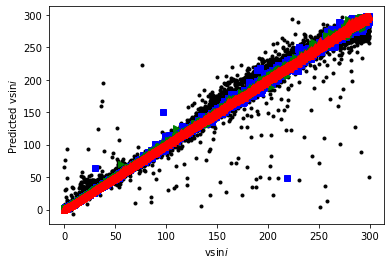

In [14]:


##fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5), sharex=True, sharey=True)

#ax[0,0].plot(y_train,y_hat,'ro', label='Training')
#ax[0,1].plot(y_test,y_pred,'bo', label='Validation')
#ax[1,0].plot(vsini,yobs,'go', label='Test')
#ax[1,1].plot(vsini2,yobs2,'go', label='Observation')


plt.plot(vsini2,yobs2,'k.', label='Observation')
plt.plot(y_test,y_pred,'bs', label='Validation')
plt.plot(vsini,yobs,'g>', label='Test')
plt.plot(y_train,y_hat,'r^', label='Training')

plt.xlabel("v$\sin$$i$")
plt.ylabel("Predicted v$\sin$$i$")
#plt.legend()

plt.plot()
plt.savefig("Figures/Vrot-optimal.png",dpi=600)
plt.savefig("Figures/Vrot-optimal.pdf")


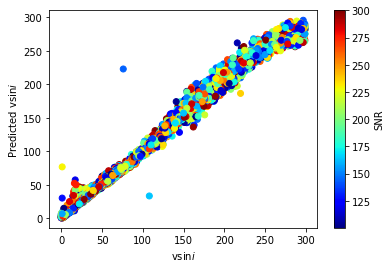

[7.3318205]


In [15]:
### Evaluation S/N

Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
Xobs2 = Xobs2.reshape(list(Xobs2.shape) + [1])
yobs2=cnn.predict(Xobs2)
vsini2=[]
for i in np.arange(len(lst2)):
    vsini2.append(float(lst2[i][51:54]))
grav2=[]
for i in np.arange(len(lst2)):
    grav2.append(float(lst2[i][42:46]))

meta2=[]
for i in np.arange(len(lst2)):
    meta2.append(float(lst2[i][67:73]))
sn2=[]
for i in np.arange(len(lst2)):
    sn2.append(float(lst2[i][92:-4]))
temp2=np.array(temp2)
yobs2=np.array(yobs2)
sn2=np.array(sn2)
vsini2=np.array(vsini2)
grav2=np.array(grav2)
#_______________________
mask=(sn2>100)&(vsini2<301)&(temp2>=7000)&(grav2>=2.0)
#-------------------------

vin=vsini2[mask]
ys=yobs2[mask]
c2=sn2[mask]
plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')

#.legend('Observations with SNR>10')

eval_obs2=0
for i in np.arange(len(vin)):
    eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
eval_obs2=eval_obs2/len(vin)
eval_obs2=eval_obs2**0.5

plt.xlabel("v$\sin$$i$")
plt.ylabel("Predicted v$\sin$$i$")



plt.show()
print(eval_obs2)



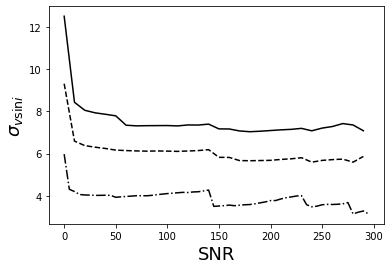

[3.14303]


In [16]:
inputs=[]
output=[]
for signal in range(0,300,10):
    mask=(sn2>signal)&(vsini2<301)&(temp2>=7000)&(grav2>=2.0)
    vin=vsini2[mask]
    ys=yobs2[mask]
    c2=sn2[mask]
#    plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')

    #.legend('Observations with SNR>10')

    eval_obs2=0
    for i in np.arange(len(vin)):
        eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
    eval_obs2=eval_obs2/len(vin)
    eval_obs2=eval_obs2**0.5
    output.append(eval_obs2)
    inputs.append(signal)
plt.plot(inputs,output,'k',label='All v$\sin i$')

#___________________

inputs1=[]
output1=[]
for signal in range(0,300,10):
    mask=(sn2>signal)&(vsini2<201)&(temp2>=7000)&(grav2>=2.0)
    vin=vsini2[mask]
    ys=yobs2[mask]
    c2=sn2[mask]
#    plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')

    #.legend('Observations with SNR>10')

    eval_obs2=0
    for i in np.arange(len(vin)):
        eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
    eval_obs2=eval_obs2/len(vin)
    eval_obs2=eval_obs2**0.5
    output1.append(eval_obs2)
    inputs1.append(signal)
plt.plot(inputs1,output1,'k--',label=' v$\sin i$ < 200 km/s')
#___________________

inputs2=[]
output2=[]
for signal in range(0,300,5):
    mask=(sn2>signal)&(vsini2<101)&(temp2>=7000)&(grav2>=2.0)
    vin=vsini2[mask]
    ys=yobs2[mask]
    c2=sn2[mask]
#    plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')

    #.legend('Observations with SNR>10')

    eval_obs2=0
    for i in np.arange(len(vin)):
        eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
    eval_obs2=eval_obs2/len(vin)
    eval_obs2=eval_obs2**0.5
    output2.append(eval_obs2)
    inputs2.append(signal)
plt.plot(inputs2,output2,'k-.',label=' v$\sin i$ < 100 km/s')






plt.xlabel("SNR",fontsize=18)
plt.ylabel("$\sigma_{v\sin i}$",fontsize=18)

plt.savefig("Figures/Vrot-SNR.png",dpi=600)
plt.savefig("Figures/Vrot-SNR.pdf")

#plt.legend()
plt.show()
print(eval_obs2)
